In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import plot_tree

## **1) Loading the data**

In [3]:
df = pd.read_csv('smartphone_prices.csv')
df

brand_name                 model        display front_camera  \
0       SAMSUNG     Samsung S24 Ultra   6.8" (120Hz)         40MP   
1       SAMSUNG      Samsung S24 Plus   6.6" (120Hz)         10MP   
2       SAMSUNG          Samsung Zero  6.41" (120Hz)        32 MP   
3       SAMSUNG           Samsung S24   6.1" (120Hz)         10MP   
4       SAMSUNG          Samsung A05s    6.5" (90Hz)          5MP   
...         ...                   ...            ...          ...   
1251       OPPO              Oppo A37           5.0"         5 MP   
1252       OPPO               Oppo F1           5.0"         8 MP   
1253       OPPO              Oppo A31           4.5"         5 MP   
1254       OPPO        Oppo Reno 4 SE          6.43"        32 MP   
1255       OPPO  Oppo Reno 4 SE 256GB          6.43"        32 MP   

                     rare_camera          processor battery_capacity  ram  \
0     108MP + 10MP + 10MP + 12MP            Exynos          5000 mAh  8.0   
1             50MP + 10MP + 12MP            Exynos          4500 mAh  8.0   
2           12 MP + 8 MP + 12 MP  Snapdragon 888 5G         4500 mAh  8.0   
3             50MP + 10MP + 12MP            Exynos          3700 mAh  8.0   
4               50MP + 2MP + 2MP            Exynos          5000 mAh  4.0   
...                          ...                ...              ...  ...   
1251                        8 MP     Snapdragon 410          2630mAh  2.0   
1252                       13 MP     Snapdragon 616              NaN  3.0   
1253                        8 MP     Snapdragon 410          2000mAh  1.0   
1254         48 MP + 8 MP + 2 MP      Dimensity 720          4300mAh  8.0   
1255         48 MP + 8 MP + 2 MP      Dimensity 720          4300mAh  8.0   

      internal_storage   price  
0                  128  334999  
1                  128  189999  
2                  256  112999  
3                  128  249999  
4                   64   24999  
...                ...     ...  
1251                16   88415  
1252                16   35999  
1253                 8   88415  
1254               128   88415  
1255               256   88415  

[1256 rows x 10 columns]

In [4]:
df = df.rename(columns={'rare_camera': 'rear_camera'})
df

brand_name                 model        display front_camera  \
0       SAMSUNG     Samsung S24 Ultra   6.8" (120Hz)         40MP   
1       SAMSUNG      Samsung S24 Plus   6.6" (120Hz)         10MP   
2       SAMSUNG          Samsung Zero  6.41" (120Hz)        32 MP   
3       SAMSUNG           Samsung S24   6.1" (120Hz)         10MP   
4       SAMSUNG          Samsung A05s    6.5" (90Hz)          5MP   
...         ...                   ...            ...          ...   
1251       OPPO              Oppo A37           5.0"         5 MP   
1252       OPPO               Oppo F1           5.0"         8 MP   
1253       OPPO              Oppo A31           4.5"         5 MP   
1254       OPPO        Oppo Reno 4 SE          6.43"        32 MP   
1255       OPPO  Oppo Reno 4 SE 256GB          6.43"        32 MP   

                     rear_camera          processor battery_capacity  ram  \
0     108MP + 10MP + 10MP + 12MP            Exynos          5000 mAh  8.0   
1             50MP + 10MP + 12MP            Exynos          4500 mAh  8.0   
2           12 MP + 8 MP + 12 MP  Snapdragon 888 5G         4500 mAh  8.0   
3             50MP + 10MP + 12MP            Exynos          3700 mAh  8.0   
4               50MP + 2MP + 2MP            Exynos          5000 mAh  4.0   
...                          ...                ...              ...  ...   
1251                        8 MP     Snapdragon 410          2630mAh  2.0   
1252                       13 MP     Snapdragon 616              NaN  3.0   
1253                        8 MP     Snapdragon 410          2000mAh  1.0   
1254         48 MP + 8 MP + 2 MP      Dimensity 720          4300mAh  8.0   
1255         48 MP + 8 MP + 2 MP      Dimensity 720          4300mAh  8.0   

      internal_storage   price  
0                  128  334999  
1                  128  189999  
2                  256  112999  
3                  128  249999  
4                   64   24999  
...                ...     ...  
1251                16   88415  
1252                16   35999  
1253                 8   88415  
1254               128   88415  
1255               256   88415  

[1256 rows x 10 columns]

In [5]:
# Split the column by '(' and '"' to extract the relevant parts
df['display_size'] = df['display'].str.split('"').str[0]  # Split by '"' and take the first part for size
df['refresh_rate'] = df['display'].str.split('(').str[-1].str.replace('Hz)', '', regex=False)  # Split by '(' and clean up the 'hz)'

df['display_size'] = pd.to_numeric(df['display_size'], errors='coerce')  # Convert size to float
df['refresh_rate'] = pd.to_numeric(df['refresh_rate'], errors='coerce')      # Convert hz to integer

## **2) Data Cleaning and Wrangling**

### 2.1) Inspecting the data

In [5]:
# Overview
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1256 entries, 0 to 1255
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   brand_name        1256 non-null   object 
 1   model             1256 non-null   object 
 2   display           1256 non-null   object 
 3   front_camera      1256 non-null   object 
 4   rear_camera       1256 non-null   object 
 5   processor         1243 non-null   object 
 6   battery_capacity  1255 non-null   object 
 7   ram               1256 non-null   float64
 8   internal_storage  1256 non-null   int64  
 9   price             1256 non-null   int64  
 10  display_size      1256 non-null   float64
 11  refresh_rate      557 non-null    float64
dtypes: float64(3), int64(2), object(7)
memory usage: 117.9+ KB


In [6]:
df.describe()

ram  internal_storage          price  display_size  \
count  1256.000000       1256.000000    1256.000000   1256.000000   
mean      6.173672        152.859873   88414.777070      6.415032   
std       3.066284        142.902946   71460.665131      1.029320   
min       0.000000          4.000000     399.000000      1.780000   
25%       4.000000         64.000000   40999.000000      6.300000   
50%       6.000000        128.000000   71499.000000      6.500000   
75%       8.000000        256.000000   94999.000000      6.670000   
max      16.000000       2048.000000  529999.000000     12.900000   

       refresh_rate  
count    557.000000  
mean     110.423698  
std       16.588763  
min       90.000000  
25%       90.000000  
50%      120.000000  
75%      120.000000  
max      144.000000

In [7]:
df.describe(include='O')

brand_name     model        display front_camera rear_camera  \
count        1256      1256           1256         1256        1256   
unique          5      1248            105           56         211   
top       SAMSUNG  Redmi 11  6.67" (120Hz)        16 MP       13 MP   
freq          404         2            107          232          59   

                 processor battery_capacity  
count                 1243             1255  
unique                 225              136  
top      Snapdragon 888 5G         5000 mAh  
freq                    29              345

brand_name            0
model                 0
display               0
front_camera          0
rear_camera           0
processor            13
battery_capacity      1
ram                   0
internal_storage      0
price                 0
display_size          0
refresh_rate        699
dtype: int64


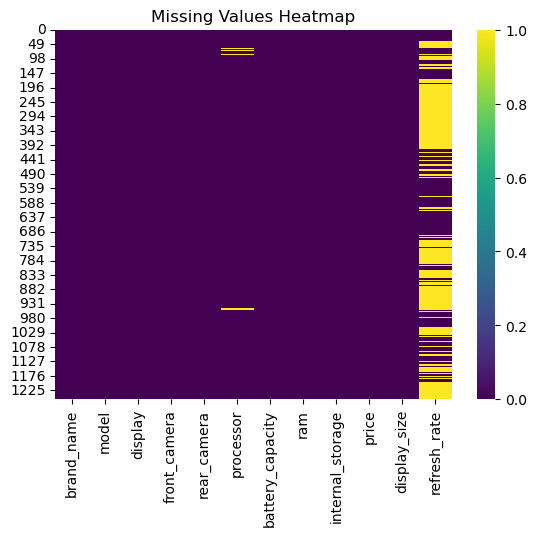

In [8]:
# Missing values
print(df.isnull().sum())

sns.heatmap(df.isnull(), cbar=True, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

In [9]:
df[df.duplicated()] #as they are essentially different models, can't drop based on domain-specific knowledge

brand_name             model display front_camera  \
474     XIAOMI          Redmi 11   6.53"         8 MP   
475     XIAOMI  Redmi 11 6GB Ram   6.53"         8 MP   

                       rear_camera     processor battery_capacity  ram  \
474  13 MP + 8 MP + 1125 MP + 2 MP  MediaTek G80         5020 mAh  4.0   
475  13 MP + 8 MP + 1125 MP + 2 MP  MediaTek G80         5020 mAh  6.0   

     internal_storage  price  display_size  refresh_rate  
474               128  30999          6.53           NaN  
475               128  33999          6.53           NaN

In [10]:
df.nunique()

brand_name             5
model               1248
display              105
front_camera          56
rear_camera          211
processor            225
battery_capacity     136
ram                   14
internal_storage      11
price                280
display_size          69
refresh_rate           3
dtype: int64

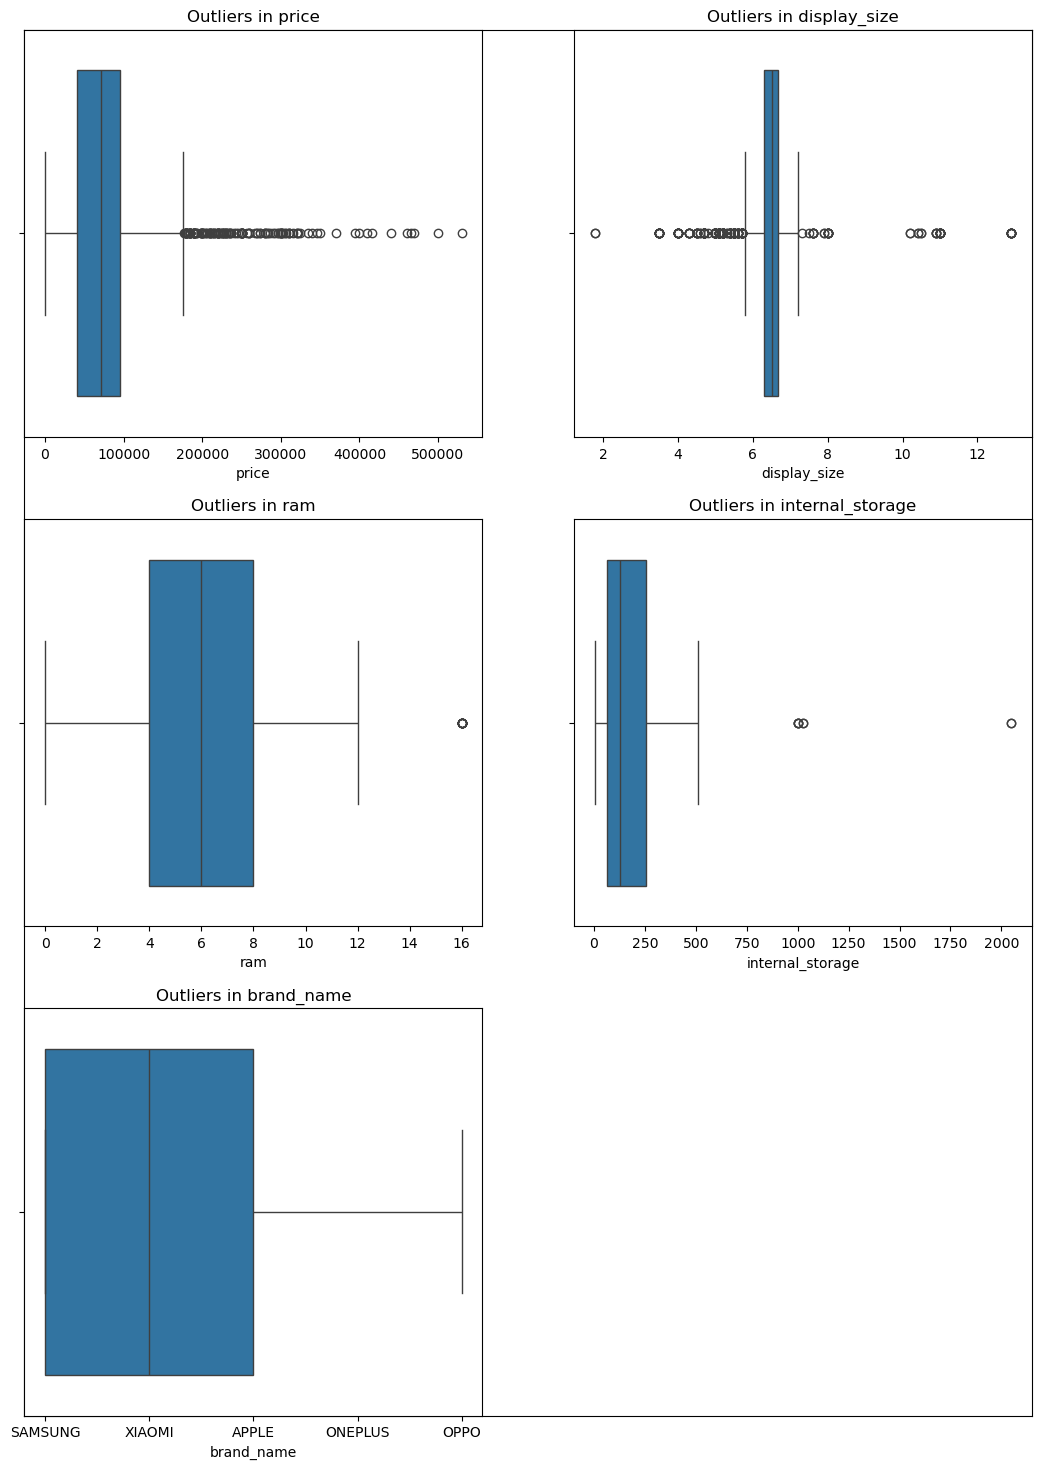

In [11]:
cols= df[['price','display_size','ram','internal_storage','brand_name']]

plt.subplots(figsize=(13,18))
plt.xticks([])
plt.yticks([])

for i, col in enumerate(cols, 1):
    plt.subplot(3,2,i)
    sns.boxplot(x=df[col])
    plt.title(f"Outliers in {col}")
plt.show()

In [12]:
# Split the rear_camera column by " + " and expand the list into separate columns
camera_columns = df['rear_camera'].str.split(r'\s*\+\s*', expand=True)

# Add the camera count column
df['camera_count'] = camera_columns.count(axis=1)

camera_columns = camera_columns.apply(lambda col: col.str.extract(r'(\d+)')[0]) #to keep only 108 from 108 MP for example

# Optionally, name the new camera columns for clarity
camera_columns.columns = [f'rear_cam_{i+1}' for i in range(camera_columns.shape[1])]

# Merge the new camera columns with the original dataframe
df = pd.concat([df, camera_columns], axis=1)

# Display the final dataframe
df

brand_name                 model        display front_camera  \
0       SAMSUNG     Samsung S24 Ultra   6.8" (120Hz)         40MP   
1       SAMSUNG      Samsung S24 Plus   6.6" (120Hz)         10MP   
2       SAMSUNG          Samsung Zero  6.41" (120Hz)        32 MP   
3       SAMSUNG           Samsung S24   6.1" (120Hz)         10MP   
4       SAMSUNG          Samsung A05s    6.5" (90Hz)          5MP   
...         ...                   ...            ...          ...   
1251       OPPO              Oppo A37           5.0"         5 MP   
1252       OPPO               Oppo F1           5.0"         8 MP   
1253       OPPO              Oppo A31           4.5"         5 MP   
1254       OPPO        Oppo Reno 4 SE          6.43"        32 MP   
1255       OPPO  Oppo Reno 4 SE 256GB          6.43"        32 MP   

                     rear_camera          processor battery_capacity  ram  \
0     108MP + 10MP + 10MP + 12MP            Exynos          5000 mAh  8.0   
1             50MP + 10MP + 12MP            Exynos          4500 mAh  8.0   
2           12 MP + 8 MP + 12 MP  Snapdragon 888 5G         4500 mAh  8.0   
3             50MP + 10MP + 12MP            Exynos          3700 mAh  8.0   
4               50MP + 2MP + 2MP            Exynos          5000 mAh  4.0   
...                          ...                ...              ...  ...   
1251                        8 MP     Snapdragon 410          2630mAh  2.0   
1252                       13 MP     Snapdragon 616              NaN  3.0   
1253                        8 MP     Snapdragon 410          2000mAh  1.0   
1254         48 MP + 8 MP + 2 MP      Dimensity 720          4300mAh  8.0   
1255         48 MP + 8 MP + 2 MP      Dimensity 720          4300mAh  8.0   

      internal_storage   price  display_size  refresh_rate  camera_count  \
0                  128  334999          6.80         120.0             4   
1                  128  189999          6.60         120.0             3   
2                  256  112999          6.41         120.0             3   
3                  128  249999          6.10         120.0             3   
4                   64   24999          6.50          90.0             3   
...                ...     ...           ...           ...           ...   
1251                16   88415          5.00           NaN             1   
1252                16   35999          5.00           NaN             1   
1253                 8   88415          4.50           NaN             1   
1254               128   88415          6.43           NaN             3   
1255               256   88415          6.43           NaN             3   

     rear_cam_1 rear_cam_2 rear_cam_3 rear_cam_4 rear_cam_5 rear_cam_6  
0           108         10         10         12        NaN        NaN  
1            50         10         12        NaN        NaN        NaN  
2            12          8         12        NaN        NaN        NaN  
3            50         10         12        NaN        NaN        NaN  
4            50          2          2        NaN        NaN        NaN  
...         ...        ...        ...        ...        ...        ...  
1251          8        NaN        NaN        NaN        NaN        NaN  
1252         13        NaN        NaN        NaN        NaN        NaN  
1253          8        NaN        NaN        NaN        NaN        NaN  
1254         48          8          2        NaN        NaN        NaN  
1255         48          8          2        NaN        NaN        NaN  

[1256 rows x 19 columns]

In [13]:
# Extract the numeric part and the unit part separately
df['front_camera_value'] = df['front_camera'].str.extract(r'(\d+)').astype(float)  # Extract numeric value

# Display the updated dataframe
df.head(5)

brand_name              model        display front_camera  \
0    SAMSUNG  Samsung S24 Ultra   6.8" (120Hz)         40MP   
1    SAMSUNG   Samsung S24 Plus   6.6" (120Hz)         10MP   
2    SAMSUNG       Samsung Zero  6.41" (120Hz)        32 MP   
3    SAMSUNG        Samsung S24   6.1" (120Hz)         10MP   
4    SAMSUNG       Samsung A05s    6.5" (90Hz)          5MP   

                  rear_camera          processor battery_capacity  ram  \
0  108MP + 10MP + 10MP + 12MP            Exynos          5000 mAh  8.0   
1          50MP + 10MP + 12MP            Exynos          4500 mAh  8.0   
2        12 MP + 8 MP + 12 MP  Snapdragon 888 5G         4500 mAh  8.0   
3          50MP + 10MP + 12MP            Exynos          3700 mAh  8.0   
4            50MP + 2MP + 2MP            Exynos          5000 mAh  4.0   

   internal_storage   price  display_size  refresh_rate  camera_count  \
0               128  334999          6.80         120.0             4   
1               128  189999          6.60         120.0             3   
2               256  112999          6.41         120.0             3   
3               128  249999          6.10         120.0             3   
4                64   24999          6.50          90.0             3   

  rear_cam_1 rear_cam_2 rear_cam_3 rear_cam_4 rear_cam_5 rear_cam_6  \
0        108         10         10         12        NaN        NaN   
1         50         10         12        NaN        NaN        NaN   
2         12          8         12        NaN        NaN        NaN   
3         50         10         12        NaN        NaN        NaN   
4         50          2          2        NaN        NaN        NaN   

   front_camera_value  
0                40.0  
1                10.0  
2                32.0  
3                10.0  
4                 5.0

In [14]:
df = df.drop('front_camera',axis=1)
df = df.rename(columns={'front_camera_value':'front_cam_MP'})
df.head(5)

brand_name              model        display                 rear_camera  \
0    SAMSUNG  Samsung S24 Ultra   6.8" (120Hz)  108MP + 10MP + 10MP + 12MP   
1    SAMSUNG   Samsung S24 Plus   6.6" (120Hz)          50MP + 10MP + 12MP   
2    SAMSUNG       Samsung Zero  6.41" (120Hz)        12 MP + 8 MP + 12 MP   
3    SAMSUNG        Samsung S24   6.1" (120Hz)          50MP + 10MP + 12MP   
4    SAMSUNG       Samsung A05s    6.5" (90Hz)            50MP + 2MP + 2MP   

           processor battery_capacity  ram  internal_storage   price  \
0            Exynos          5000 mAh  8.0               128  334999   
1            Exynos          4500 mAh  8.0               128  189999   
2  Snapdragon 888 5G         4500 mAh  8.0               256  112999   
3            Exynos          3700 mAh  8.0               128  249999   
4            Exynos          5000 mAh  4.0                64   24999   

   display_size  refresh_rate  camera_count rear_cam_1 rear_cam_2 rear_cam_3  \
0          6.80         120.0             4        108         10         10   
1          6.60         120.0             3         50         10         12   
2          6.41         120.0             3         12          8         12   
3          6.10         120.0             3         50         10         12   
4          6.50          90.0             3         50          2          2   

  rear_cam_4 rear_cam_5 rear_cam_6  front_cam_MP  
0         12        NaN        NaN          40.0  
1        NaN        NaN        NaN          10.0  
2        NaN        NaN        NaN          32.0  
3        NaN        NaN        NaN          10.0  
4        NaN        NaN        NaN           5.0

In [15]:
df.isnull().sum()

brand_name             0
model                  0
display                0
rear_camera            0
processor             13
battery_capacity       1
ram                    0
internal_storage       0
price                  0
display_size           0
refresh_rate         699
camera_count           0
rear_cam_1             2
rear_cam_2           239
rear_cam_3           426
rear_cam_4           944
rear_cam_5          1256
rear_cam_6          1255
front_cam_MP          15
dtype: int64

In [16]:
# Clean the 'battery' column
df['battery_mAh'] = df['battery_capacity'].str.extract('(\d+)').astype(float)

# Display the cleaned column
print(df[['battery_capacity', 'battery_mAh']])

     battery_capacity  battery_mAh
0            5000 mAh       5000.0
1            4500 mAh       4500.0
2            4500 mAh       4500.0
3            3700 mAh       3700.0
4            5000 mAh       5000.0
...               ...          ...
1251          2630mAh       2630.0
1252              NaN          NaN
1253          2000mAh       2000.0
1254          4300mAh       4300.0
1255          4300mAh       4300.0

[1256 rows x 2 columns]


In [17]:
df[df['battery_mAh'].isnull()]

brand_name    model display rear_camera        processor  \
1252       OPPO  Oppo F1    5.0"       13 MP   Snapdragon 616   

     battery_capacity  ram  internal_storage  price  display_size  \
1252              NaN  3.0                16  35999           5.0   

      refresh_rate  camera_count rear_cam_1 rear_cam_2 rear_cam_3 rear_cam_4  \
1252           NaN             1         13        NaN        NaN        NaN   

     rear_cam_5 rear_cam_6  front_cam_MP  battery_mAh  
1252        NaN        NaN           8.0          NaN

In [18]:
df['battery_mAh']= df['battery_mAh'].fillna(2500)
df['battery_capacity']= df['battery_capacity'].fillna('2500 mAh')

In [19]:
df[df['processor'].isnull()]

brand_name                 model       display  \
63     SAMSUNG        Samsung A73 5G  6.7" (120Hz)   
64     SAMSUNG  Samsung A73 5G 128GB  6.7" (120Hz)   
65     SAMSUNG  Samsung A73 5G 256GB  6.7" (120Hz)   
69     SAMSUNG           Samsung M23   6.6" (90Hz)   
70     SAMSUNG           Samsung M33   6.6" (90Hz)   
71     SAMSUNG   Samsung M33 8GB Ram   6.6" (90Hz)   
82     SAMSUNG           Samsung A03          6.5"   
83     SAMSUNG      Samsung A03 64GB          6.5"   
84     SAMSUNG     Samsung A03 128GB          6.5"   
947      APPLE            iPhone 3GS          3.5"   
948      APPLE       iPhone 3GS 32GB          3.5"   
949      APPLE             iPhone 3G          3.5"   
950      APPLE        iPhone 3G 16GB          3.5"   

                       rear_camera processor battery_capacity    ram  \
63    108 MP + 12 MP + 5 MP + 5 MP       NaN         5000 mAh  6.000   
64    108 MP + 12 MP + 5 MP + 5 MP       NaN         5000 mAh  8.000   
65    108 MP + 12 MP + 5 MP + 5 MP       NaN         5000 mAh  8.000   
69          50 MP + 8 MP + 1122 MP       NaN         5000 mAh  4.000   
70   50 MP + 8 MP + 1122 MP + 2 MP       NaN         6000 mAh  6.000   
71   50 MP + 8 MP + 1122 MP + 2 MP       NaN         6000 mAh  8.000   
82                    48 MP + 2 MP       NaN         5000 mAh  3.000   
83                    48 MP + 2 MP       NaN         5000 mAh  4.000   
84                    48 MP + 2 MP       NaN         5000 mAh  4.000   
947                        3.15 MP       NaN         1400 mah  0.256   
948                        3.15 MP       NaN          1400mah  0.256   
949                           2 MP       NaN          1220mah  0.128   
950                           2 MP       NaN          1220mah  0.128   

     internal_storage  price  display_size  refresh_rate  camera_count  \
63                128  77999           6.7         120.0             4   
64                128  81999           6.7         120.0             4   
65                256  86999           6.7         120.0             4   
69                128  33999           6.6          90.0             3   
70                128  49999           6.6          90.0             4   
71                128  52999           6.6          90.0             4   
82                 32  17999           6.5           NaN             2   
83                 64  20999           6.5           NaN             2   
84                128  23999           6.5           NaN             2   
947                16  33000           3.5           NaN             1   
948                32  51000           3.5           NaN             1   
949                 8  88415           3.5           NaN             1   
950                16  88415           3.5           NaN             1   

    rear_cam_1 rear_cam_2 rear_cam_3 rear_cam_4 rear_cam_5 rear_cam_6  \
63         108         12          5          5        NaN        NaN   
64         108         12          5          5        NaN        NaN   
65         108         12          5          5        NaN        NaN   
69          50          8       1122        NaN        NaN        NaN   
70          50          8       1122          2        NaN        NaN   
71          50          8       1122          2        NaN        NaN   
82          48          2        NaN        NaN        NaN        NaN   
83          48          2        NaN        NaN        NaN        NaN   
84          48          2        NaN        NaN        NaN        NaN   
947          3        NaN        NaN        NaN        NaN        NaN   
948          3        NaN        NaN        NaN        NaN        NaN   
949          2        NaN        NaN        NaN        NaN        NaN   
950          2        NaN        NaN        NaN        NaN        NaN   

     front_cam_MP  battery_mAh  
63           32.0       5000.0  
64           32.0       5000.0  
65           32.0       5000.0  
69            8.0       5000.0  
70           

In [20]:
replacement_dict = {
    63: 'Snapdragon 778G 5G',   # Replace null at index 63
    64: 'Snapdragon 778G 5G',       
    65: 'Snapdragon 778G 5G',
    69: 'Snapdragon 750G 5G',
    70: 'Exynos 1280',
    71: 'Exynos 1280',
    82: 'Unisoc T606',
    83: 'Unisoc T606',
    84: 'Unisoc T606',
    947: 'Samsung APL0298C05',
    948: 'Samsung APL0298C05',
    949: 'Samsung APL0298C05',
    950: 'Samsung APL0298C05'
}

df.loc[replacement_dict.keys(), 'processor'] = replacement_dict.values()

df['processor'].isnull().sum()

0

In [21]:
df = df.drop('refresh_rate',axis=1) #dropped due to too many null values

In [22]:
df[['rear_cam_1', 
    'rear_cam_2', 
    'rear_cam_3', 
    'rear_cam_4', 
    'rear_cam_5', 
    'rear_cam_6']] = df[['rear_cam_1', 'rear_cam_2', 'rear_cam_3', 'rear_cam_4', 'rear_cam_5', 'rear_cam_6']].fillna(0)

df.isnull().sum()

# here none meant that there, for example, is no 4th or 5th camera, so none would be 0.

C:\Users\musta\AppData\Local\Temp\ipykernel_828\200265082.py:6: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  'rear_cam_6']] = df[['rear_cam_1', 'rear_cam_2', 'rear_cam_3', 'rear_cam_4', 'rear_cam_5', 'rear_cam_6']].fillna(0)


brand_name           0
model                0
display              0
rear_camera          0
processor            0
battery_capacity     0
ram                  0
internal_storage     0
price                0
display_size         0
camera_count         0
rear_cam_1           0
rear_cam_2           0
rear_cam_3           0
rear_cam_4           0
rear_cam_5           0
rear_cam_6           0
front_cam_MP        15
battery_mAh          0
dtype: int64

In [23]:
df[df['front_cam_MP'].isnull()]

brand_name                  model                      display  \
53      SAMSUNG         Samsung A33 5G  6.4" (60 (International)Hz)   
234     SAMSUNG            Samsung A80                         6.7"   
318     SAMSUNG  Samsung J1 Mini Prime                         4.0"   
940       APPLE              iPhone 4s                         3.5"   
941       APPLE         iPhone 4s 16GB                         3.5"   
942       APPLE         iPhone 4s 32GB                         3.5"   
943       APPLE         iPhone 4s 64GB                         3.5"   
944       APPLE               iPhone 4                         3.5"   
945       APPLE          iPhone 4 16GB                         3.5"   
946       APPLE          iPhone 4 32GB                         3.5"   
947       APPLE             iPhone 3GS                         3.5"   
948       APPLE        iPhone 3GS 32GB                         3.5"   
949       APPLE              iPhone 3G                         3.5"   
950       APPLE         iPhone 3G 16GB                         3.5"   
1012    ONEPLUS         OnePlus Clover                        6.52"   

                     rear_camera  \
53    48 MP + 8 MP + 5 MP + 2 MP   
234                 48 MP + 8 MP   
318                         5 MP   
940                         8 MP   
941                         8 MP   
942                         8 MP   
943                         8 MP   
944                         5 MP   
945                         5 MP   
946                         5 MP   
947                      3.15 MP   
948                      3.15 MP   
949                         2 MP   
950                         2 MP   
1012         13 MP + 2 MP + 2 MP   

                                              processor battery_capacity  \
53                                          Exynos 1200         5000 mAh   
234                                      Snapdragon 730          3700mAh   
318                                   Spreadtrum SC9830          1500mAh   
940                                            Apple A5          1432mAh   
941                                            Apple A5          1432mAh   
942                                            Apple A5          1432mAh   
943                                            Apple A5          1432mAh   
944                                            Apple A4          1420mAh   
945                                            Apple A4          1420mAh   
946                                            Apple A4          1420mAh   
947   (Snapdragon 778G 5G, Snapdragon 778G 5G, Snapd...         1400 mah   
948   (Snapdragon 778G 5G, Snapdragon 778G 5G, Snapd...          1400mah   
949   (Snapdragon 778G 5G, Snapdragon 778G 5G, Snapd...          1220mah   
950   (Snapdragon 778G 5G, Snapdragon 778G 5G, Snapd...          1220mah   
1012                                     Snapdragon 460          6000mAh   

        ram  internal_storage  price  display_size  camera_count rear_cam_1  \
53    6.000               128  52999          6.40             4         48   
234   8.000               128  81000          6.70             2         48   
318   1.000                 8  88415          4.00             1          5   
940   0.512                 8   9500          3.50             1          8   
941   0.512                16  88415          3.50             1          8   
942   0.512                32  88415          3.50             1          8   
943   0.512                64  88415          3.50             1          8   
944   0.512                 8   7999          3.50             1          5   
945   0.512                16  88415          3.50             1          5   
946   0.512                32  88415          3.50             1          5   
947   0.256                16  33000          3.50             1          3   
948   0.256                32  51000          3.50             1          3   
949   0.128                 8  88415          3

In [24]:
front_null_dict = {
    53: 13.0,   # Replace null at index 63
    234: 48.0,       
    318: 0.3,
    940: 0.3,
    941: 0.3,
    942: 0.3,
    943: 0.3,
    944: 0.3,
    945: 0.3,
    946: 0.3,
    947: 0.0,
    948: 0.0,
    949: 0.0,
    950: 0.0,
    1012: 4.0
}

df.loc[front_null_dict.keys(), 'front_cam_MP'] = list(front_null_dict.values())

df['front_cam_MP'].isnull().sum()

0

In [25]:
df = df.drop(['battery_capacity','display'], axis=1) #dropped as battery_mAh and display_size are same
df

brand_name                 model                 rear_camera  \
0       SAMSUNG     Samsung S24 Ultra  108MP + 10MP + 10MP + 12MP   
1       SAMSUNG      Samsung S24 Plus          50MP + 10MP + 12MP   
2       SAMSUNG          Samsung Zero        12 MP + 8 MP + 12 MP   
3       SAMSUNG           Samsung S24          50MP + 10MP + 12MP   
4       SAMSUNG          Samsung A05s            50MP + 2MP + 2MP   
...         ...                   ...                         ...   
1251       OPPO              Oppo A37                        8 MP   
1252       OPPO               Oppo F1                       13 MP   
1253       OPPO              Oppo A31                        8 MP   
1254       OPPO        Oppo Reno 4 SE         48 MP + 8 MP + 2 MP   
1255       OPPO  Oppo Reno 4 SE 256GB         48 MP + 8 MP + 2 MP   

              processor  ram  internal_storage   price  display_size  \
0               Exynos   8.0               128  334999          6.80   
1               Exynos   8.0               128  189999          6.60   
2     Snapdragon 888 5G  8.0               256  112999          6.41   
3               Exynos   8.0               128  249999          6.10   
4               Exynos   4.0                64   24999          6.50   
...                 ...  ...               ...     ...           ...   
1251     Snapdragon 410  2.0                16   88415          5.00   
1252     Snapdragon 616  3.0                16   35999          5.00   
1253     Snapdragon 410  1.0                 8   88415          4.50   
1254      Dimensity 720  8.0               128   88415          6.43   
1255      Dimensity 720  8.0               256   88415          6.43   

      camera_count rear_cam_1 rear_cam_2 rear_cam_3 rear_cam_4  rear_cam_5  \
0                4        108         10         10         12           0   
1                3         50         10         12          0           0   
2                3         12          8         12          0           0   
3                3         50         10         12          0           0   
4                3         50          2          2          0           0   
...            ...        ...        ...        ...        ...         ...   
1251             1          8          0          0          0           0   
1252             1         13          0          0          0           0   
1253             1          8          0          0          0           0   
1254             3         48          8          2          0           0   
1255             3         48          8          2          0           0   

     rear_cam_6  front_cam_MP  battery_mAh  
0             0          40.0       5000.0  
1             0          10.0       4500.0  
2             0          32.0       4500.0  
3             0          10.0       3700.0  
4             0           5.0       5000.0  
...         ...           ...          ...  
1251          0           5.0       2630.0  
1252          0           8.0       2500.0  
1253          0           5.0       2000.0  
1254          0          32.0       4300.0  
1255          0          32.0       4300.0  

[1256 rows x 17 columns]

In [26]:
df= df.rename(columns={'camera_count':'rear_cam_count'})
df.head(5)

brand_name              model                 rear_camera  \
0    SAMSUNG  Samsung S24 Ultra  108MP + 10MP + 10MP + 12MP   
1    SAMSUNG   Samsung S24 Plus          50MP + 10MP + 12MP   
2    SAMSUNG       Samsung Zero        12 MP + 8 MP + 12 MP   
3    SAMSUNG        Samsung S24          50MP + 10MP + 12MP   
4    SAMSUNG       Samsung A05s            50MP + 2MP + 2MP   

           processor  ram  internal_storage   price  display_size  \
0            Exynos   8.0               128  334999          6.80   
1            Exynos   8.0               128  189999          6.60   
2  Snapdragon 888 5G  8.0               256  112999          6.41   
3            Exynos   8.0               128  249999          6.10   
4            Exynos   4.0                64   24999          6.50   

   rear_cam_count rear_cam_1 rear_cam_2 rear_cam_3 rear_cam_4  rear_cam_5  \
0               4        108         10         10         12           0   
1               3         50         10         12          0           0   
2               3         12          8         12          0           0   
3               3         50         10         12          0           0   
4               3         50          2          2          0           0   

  rear_cam_6  front_cam_MP  battery_mAh  
0          0          40.0       5000.0  
1          0          10.0       4500.0  
2          0          32.0       4500.0  
3          0          10.0       3700.0  
4          0           5.0       5000.0

### **Outliers**

In [27]:
# rows where RAM exceeds 24GB (arbitrary for typical phones)
df[df['ram'] >= 16]

brand_name                               model  \
199     SAMSUNG     Samsung Note20 Plus 5G 16GB Ram   
480      XIAOMI          Xiaomi Mix Fold 2 16GB Ram   
516      XIAOMI   Xiaomi Black Shark 5 Pro 16GB Ram   
594      XIAOMI  Xiaomi Black Shark 4S Pro 16GB Ram   
673      XIAOMI   Xiaomi Black Shark 4 Pro 16GB Ram   
700      XIAOMI         Xiaomi Mi Mix Fold 16GB Ram   
807       APPLE           iPad Pro 12.9 2022 1024GB   
808       APPLE           iPad Pro 12.9 2022 2048GB   
814       APPLE             iPad Pro 11 2022 1024GB   
815       APPLE             iPad Pro 11 2022 2048GB   
1070       OPPO           Oppo Find X4 Pro 16GB Ram   

                       rear_camera            processor   ram  \
199         108 MP + 13 MP + 12 MP           Exynos 992  16.0   
480          108 MP + 8 MP + 13 MP    Snapdragon 8 Gen1  16.0   
516          108 MP + 13 MP + 5 MP   Snapdragon 8 Gen 1  16.0   
594         64 MP + 8 MP + 1125 MP   Snapdragon 888+ 5G  16.0   
673         64 MP + 8 MP + 1125 MP    Snapdragon 888 5G  16.0   
700          108 MP + 8 MP + 13 MP       Snapdragon 888  16.0   
807                  12 MP + 10 MP             Apple M2  16.0   
808                  12 MP + 10 MP             Apple M2  16.0   
814                  12 MP + 10 MP             Apple M2  16.0   
815                  12 MP + 10 MP             Apple M2  16.0   
1070  50 MP + 13 MP + 50 MP + 3 MP    Snapdragon 8 Gen1  16.0   

      internal_storage   price  display_size  rear_cam_count rear_cam_1  \
199                512  197999          6.90               3        108   
480                512  302999          8.01               3        108   
516                512  172999          6.67               3        108   
594                512  144999          6.67               3         64   
673                512  132999          6.67               3         64   
700                512  235999          8.01               3        108   
807               1024  499999         12.90               2         12   
808               2048  529999         12.90               2         12   
814               1024  319999         11.00               2         12   
815               2048  349999         11.00               2         12   
1070               512  174999          6.70               4         50   

     rear_cam_2 rear_cam_3 rear_cam_4  rear_cam_5 rear_cam_6  front_cam_MP  \
199          13         12          0           0          0          40.0   
480           8         13          0           0          0          20.0   
516          13          5          0           0          0          16.0   
594           8       1125          0           0          0          20.0   
673           8       1125          0           0          0          20.0   
700           8         13          0           0          0          20.0   
807          10          0          0           0          0          12.0   
808          10          0          0           0          0          12.0   
814          10          0          0           0          0          12.0   
815          10          0          0           0          0          12.0   
1070         13         50          3           0          0          32.0   

      battery_mAh  
199        4500.0  
480        5020.0  
516        4650.0  
594        4500.0  
673        4500.0  
700        5020.0  
807       10758.0  
808       10758.0  
814        7538.0  
815        7538.0  
1070       4500.0

In [28]:
# Check rows with outlier internal storage as we see from boxplot 750GB is outlier
df[df['internal_storage'] >= 750]

brand_name                       model            rear_camera  \
807      APPLE   iPad Pro 12.9 2022 1024GB          12 MP + 10 MP   
808      APPLE   iPad Pro 12.9 2022 2048GB          12 MP + 10 MP   
814      APPLE     iPad Pro 11 2022 1024GB          12 MP + 10 MP   
815      APPLE     iPad Pro 11 2022 2048GB          12 MP + 10 MP   
847      APPLE           iPhone 13 Pro 1TB  12 MP + 12 MP + 12 MP   
851      APPLE       iPhone 13 Pro Max 1TB  12 MP + 12 MP + 12 MP   
894      APPLE  iPad Pro 12.9 2018 6GB Ram                  12 MP   
898      APPLE         iPad Pro 11 6GB Ram                  12 MP   

             processor   ram  internal_storage   price  display_size  \
807           Apple M2  16.0              1024  499999          12.9   
808           Apple M2  16.0              2048  529999          12.9   
814           Apple M2  16.0              1024  319999          11.0   
815           Apple M2  16.0              2048  349999          11.0   
847  Apple A15 Bionic    6.0              1000  394000           6.1   
851  Apple A15 Bionic    6.0              1000  416300           6.7   
894  Apple A12X Bionic   6.0              1000   88415          12.9   
898  Apple A12X Bionic   6.0              1000   88415          11.0   

     rear_cam_count rear_cam_1 rear_cam_2 rear_cam_3 rear_cam_4  rear_cam_5  \
807               2         12         10          0          0           0   
808               2         12         10          0          0           0   
814               2         12         10          0          0           0   
815               2         12         10          0          0           0   
847               3         12         12         12          0           0   
851               3         12         12         12          0           0   
894               1         12          0          0          0           0   
898               1         12          0          0          0           0   

    rear_cam_6  front_cam_MP  battery_mAh  
807          0          12.0      10758.0  
808          0          12.0      10758.0  
814          0          12.0       7538.0  
815          0          12.0       7538.0  
847          0          12.0       3125.0  
851          0          12.0       4373.0  
894          0           7.0       9720.0  
898          0           7.0       7812.0

In [29]:
df = df.drop([807,808,814,815,894,898],axis=0) #focus in smartphones so drop iPads
df[df['internal_storage'] >= 750]

brand_name                  model            rear_camera  \
847      APPLE      iPhone 13 Pro 1TB  12 MP + 12 MP + 12 MP   
851      APPLE  iPhone 13 Pro Max 1TB  12 MP + 12 MP + 12 MP   

             processor  ram  internal_storage   price  display_size  \
847  Apple A15 Bionic   6.0              1000  394000           6.1   
851  Apple A15 Bionic   6.0              1000  416300           6.7   

     rear_cam_count rear_cam_1 rear_cam_2 rear_cam_3 rear_cam_4  rear_cam_5  \
847               3         12         12         12          0           0   
851               3         12         12         12          0           0   

    rear_cam_6  front_cam_MP  battery_mAh  
847          0          12.0       3125.0  
851          0          12.0       4373.0

In [30]:
df['price_log'] = np.log1p(df['price'])
df.head(5)

brand_name              model                 rear_camera  \
0    SAMSUNG  Samsung S24 Ultra  108MP + 10MP + 10MP + 12MP   
1    SAMSUNG   Samsung S24 Plus          50MP + 10MP + 12MP   
2    SAMSUNG       Samsung Zero        12 MP + 8 MP + 12 MP   
3    SAMSUNG        Samsung S24          50MP + 10MP + 12MP   
4    SAMSUNG       Samsung A05s            50MP + 2MP + 2MP   

           processor  ram  internal_storage   price  display_size  \
0            Exynos   8.0               128  334999          6.80   
1            Exynos   8.0               128  189999          6.60   
2  Snapdragon 888 5G  8.0               256  112999          6.41   
3            Exynos   8.0               128  249999          6.10   
4            Exynos   4.0                64   24999          6.50   

   rear_cam_count rear_cam_1 rear_cam_2 rear_cam_3 rear_cam_4  rear_cam_5  \
0               4        108         10         10         12           0   
1               3         50         10         12          0           0   
2               3         12          8         12          0           0   
3               3         50         10         12          0           0   
4               3         50          2          2          0           0   

  rear_cam_6  front_cam_MP  battery_mAh  price_log  
0          0          40.0       5000.0  12.721886  
1          0          10.0       4500.0  12.154779  
2          0          32.0       4500.0  11.635143  
3          0          10.0       3700.0  12.429216  
4          0           5.0       5000.0  10.126631

In [31]:
# Assuming display sizes between 4.5 and 7.5 inches are reasonable
df = df[(df['display_size'] >= 4.5) & (df['display_size'] <= 7.5)]

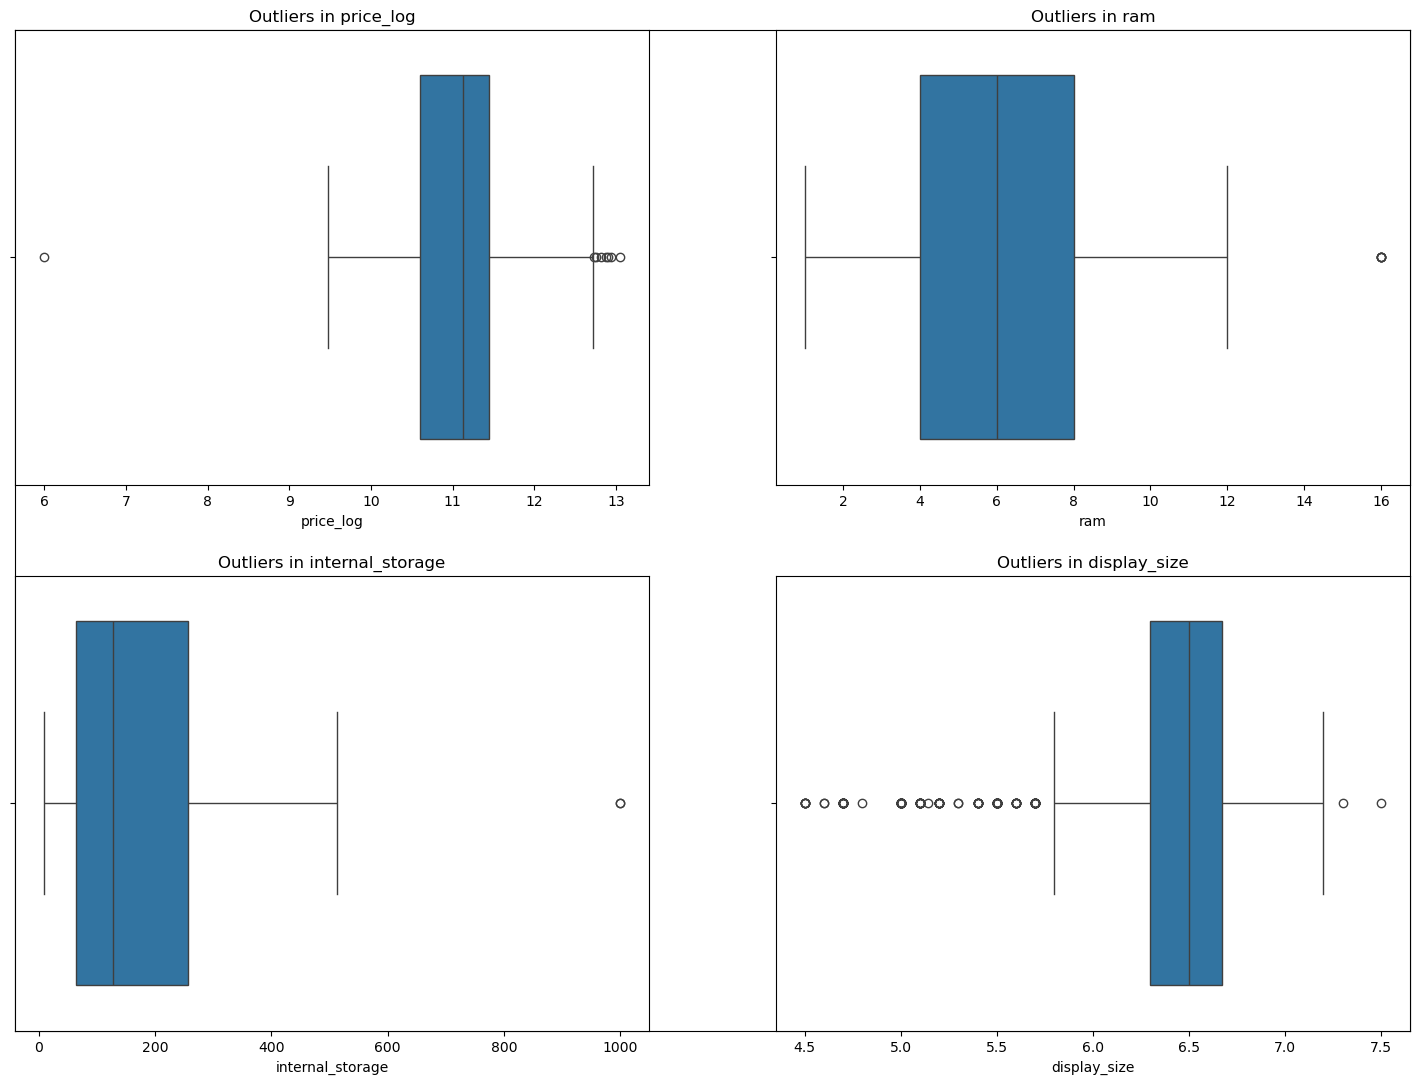

In [32]:
# recheck outliers using boxplot
outlier_col = df[['price_log','ram','internal_storage','display_size']]

plt.subplots(figsize=(18,13))
plt.xticks([])
plt.yticks([])

for i, col in enumerate(outlier_col, 1):
    plt.subplot(2,2,i)
    sns.boxplot(x=df[col])
    plt.title(f"Outliers in {col}")
plt.show()

In [33]:
# Create dummy variables for 'brand_name'
df_dummies = pd.get_dummies(df['brand_name'], drop_first=True)

# Drop the original 'brand_name' column
data = df.drop('brand_name', axis=1)

# Concatenate the dummy columns to the original DataFrame
data = pd.concat([df, df_dummies], axis=1)

data

brand_name                 model                 rear_camera  \
0       SAMSUNG     Samsung S24 Ultra  108MP + 10MP + 10MP + 12MP   
1       SAMSUNG      Samsung S24 Plus          50MP + 10MP + 12MP   
2       SAMSUNG          Samsung Zero        12 MP + 8 MP + 12 MP   
3       SAMSUNG           Samsung S24          50MP + 10MP + 12MP   
4       SAMSUNG          Samsung A05s            50MP + 2MP + 2MP   
...         ...                   ...                         ...   
1251       OPPO              Oppo A37                        8 MP   
1252       OPPO               Oppo F1                       13 MP   
1253       OPPO              Oppo A31                        8 MP   
1254       OPPO        Oppo Reno 4 SE         48 MP + 8 MP + 2 MP   
1255       OPPO  Oppo Reno 4 SE 256GB         48 MP + 8 MP + 2 MP   

              processor  ram  internal_storage   price  display_size  \
0               Exynos   8.0               128  334999          6.80   
1               Exynos   8.0               128  189999          6.60   
2     Snapdragon 888 5G  8.0               256  112999          6.41   
3               Exynos   8.0               128  249999          6.10   
4               Exynos   4.0                64   24999          6.50   
...                 ...  ...               ...     ...           ...   
1251     Snapdragon 410  2.0                16   88415          5.00   
1252     Snapdragon 616  3.0                16   35999          5.00   
1253     Snapdragon 410  1.0                 8   88415          4.50   
1254      Dimensity 720  8.0               128   88415          6.43   
1255      Dimensity 720  8.0               256   88415          6.43   

      rear_cam_count rear_cam_1  ... rear_cam_4 rear_cam_5 rear_cam_6  \
0                  4        108  ...         12          0          0   
1                  3         50  ...          0          0          0   
2                  3         12  ...          0          0          0   
3                  3         50  ...          0          0          0   
4                  3         50  ...          0          0          0   
...              ...        ...  ...        ...        ...        ...   
1251               1          8  ...          0          0          0   
1252               1         13  ...          0          0          0   
1253               1          8  ...          0          0          0   
1254               3         48  ...          0          0          0   
1255               3         48  ...          0          0          0   

      front_cam_MP battery_mAh  price_log  ONEPLUS   OPPO  SAMSUNG  XIAOMI  
0             40.0      5000.0  12.721886    False  False     True   False  
1             10.0      4500.0  12.154779    False  False     True   False  
2             32.0      4500.0  11.635143    False  False     True   False  
3             10.0      3700.0  12.429216    False  False     True   False  
4              5.0      5000.0  10.126631    False  False     True   False  
...            ...         ...        ...      ...    ...      ...     ...  
1251           5.0      2630.0  11.389808    False   True    False   False  
1252           8.0      2500.0  10.491274    False   True    False   False  
1253           5.0      2000.0  11.389808    False   True    False   False  
1254          32.0      4300.0  11.389808    False   True    False   False  
1255          32.0      4300.0  11.389808    False   True    False   False  

[1181 rows x 22 columns]

### Summary of data cleaning part:
- Checked for null values, and unique values, the latter for making dummies for categorical explanatory variables
- `battery_capacity` column was split to extract only numerical value for battery, for example, "5000" from "5000mAh" and only the new battery_mAh column was retained. One missing value was filled with the appropriate value taken from phone specification (website was GSMArena)
- Similarly, `display` column was also split into display_size and `refresh_rate` as some values (or rows of data) had display size and refresh rate, like "6.5" (90hz)" and others only had display size. 
- Too many null values in `refresh_rate` column, so dropped it from the dataset
- Around 13 null_values in the `processor` column so filled with domain-specific knowledge (also taken based on model from GSMArena)
- The `rear_camera` column was split into six columns as each camera had different megapixels. A seventh column was made `rear_cam_count` to show the number of rear cameras in each phone
- Only 5 brands part of the dataset in the `brand_name` column, made dummies for that as it was categorical. One column from the dummies created was left out, in this case, "APPLE" to avoid dummy variable trap
- Made a new column `price_log` to reduce outliers in the price column where log of base 10 taken for `price` values
- Many outliers in `display_size` as well, reduced to a certain range as smarthphones have a variety of display sizes
- One outlier each in `ram` and `internal_storage` but did not change them as such as those smartphones have better specs than the competition

## **3) Descriptive Analysis**

### 3.1) Summary statistics

In [34]:
data.describe().transpose()

count          mean           std          min  \
ram               1181.0      6.236664      2.892070     1.000000   
internal_storage  1181.0    146.079594    106.097032     8.000000   
price             1181.0  84065.089754  63942.996724   399.000000   
display_size      1181.0      6.340440      0.503870     4.500000   
rear_cam_count    1181.0      2.803556      1.003564     1.000000   
rear_cam_5        1181.0      0.000000      0.000000     0.000000   
front_cam_MP      1181.0     15.533446      9.236989     1.000000   
battery_mAh       1181.0   4346.216765    934.126246  1715.000000   
price_log         1181.0     11.098507      0.698969     5.991465   

                           25%           50%          75%            max  
ram                   4.000000      6.000000      8.00000      16.000000  
internal_storage     64.000000    128.000000    256.00000    1000.000000  
price             39999.000000  67999.000000  93999.00000  465999.000000  
display_size          6.300000      6.500000      6.67000       7.500000  
rear_cam_count        2.000000      3.000000      4.00000       6.000000  
rear_cam_5            0.000000      0.000000      0.00000       0.000000  
front_cam_MP          8.000000     16.000000     20.00000      48.000000  
battery_mAh        4000.000000   4500.000000   5000.00000    7000.000000  
price_log            10.596635     11.127263     11.45105      13.051941

In [35]:
data.describe(include='O')

brand_name                       model rear_camera           processor  \
count        1181                        1181        1181                1181   
unique          5                        1173         207                 215   
top       SAMSUNG  Xiaomi Black Shark 4 256GB       13 MP   Snapdragon 888 5G   
freq          387                           2          58                  28   

       rear_cam_1 rear_cam_2  rear_cam_3  rear_cam_4  rear_cam_6  
count        1181       1181        1181        1181        1181  
unique         13         15          15          11           2  
top            48          8           0           0           0  
freq          247        435         363         869        1180

### 3.2) Visual Analysis

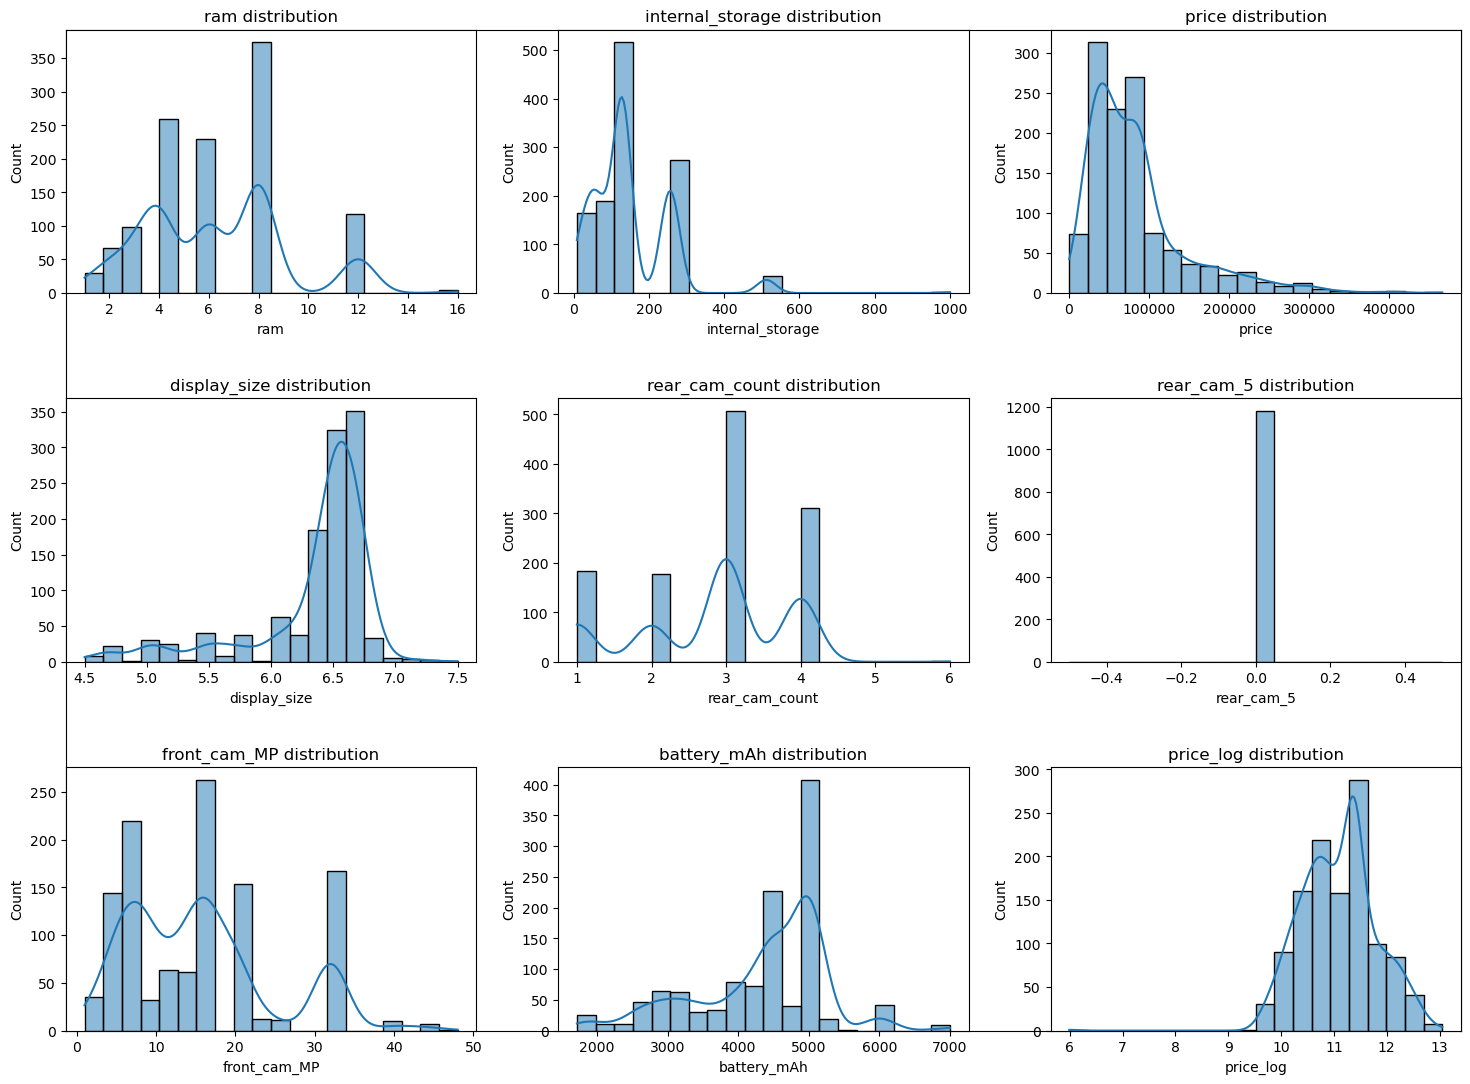

<Figure size 640x480 with 0 Axes>

In [36]:
num_cols= data.describe().columns

fig = plt.subplots(figsize=(18,13))
plt.xticks([])
plt.yticks([])

for i, col in enumerate(num_cols,1):
    plt.subplot(3,3,i)
    sns.histplot(df[col], kde=True, bins=20)
    plt.title(f"{col} distribution")
    plt.xlabel(f"{col}")

plt.subplots_adjust(hspace=0.4)
plt.show()
plt.tight_layout()

In [37]:
data.info()

data[['rear_cam_1','rear_cam_2','rear_cam_3','rear_cam_4','rear_cam_5','rear_cam_6']] = data[['rear_cam_1','rear_cam_2','rear_cam_3',
                                                                                              'rear_cam_4','rear_cam_5',
                                                                                              'rear_cam_6']].apply(pd.to_numeric, errors= 'coerce')
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1181 entries, 0 to 1255
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   brand_name        1181 non-null   object 
 1   model             1181 non-null   object 
 2   rear_camera       1181 non-null   object 
 3   processor         1181 non-null   object 
 4   ram               1181 non-null   float64
 5   internal_storage  1181 non-null   int64  
 6   price             1181 non-null   int64  
 7   display_size      1181 non-null   float64
 8   rear_cam_count    1181 non-null   int64  
 9   rear_cam_1        1181 non-null   object 
 10  rear_cam_2        1181 non-null   object 
 11  rear_cam_3        1181 non-null   object 
 12  rear_cam_4        1181 non-null   object 
 13  rear_cam_5        1181 non-null   int64  
 14  rear_cam_6        1181 non-null   object 
 15  front_cam_MP      1181 non-null   float64
 16  battery_mAh       1181 non-null   float64
 17  

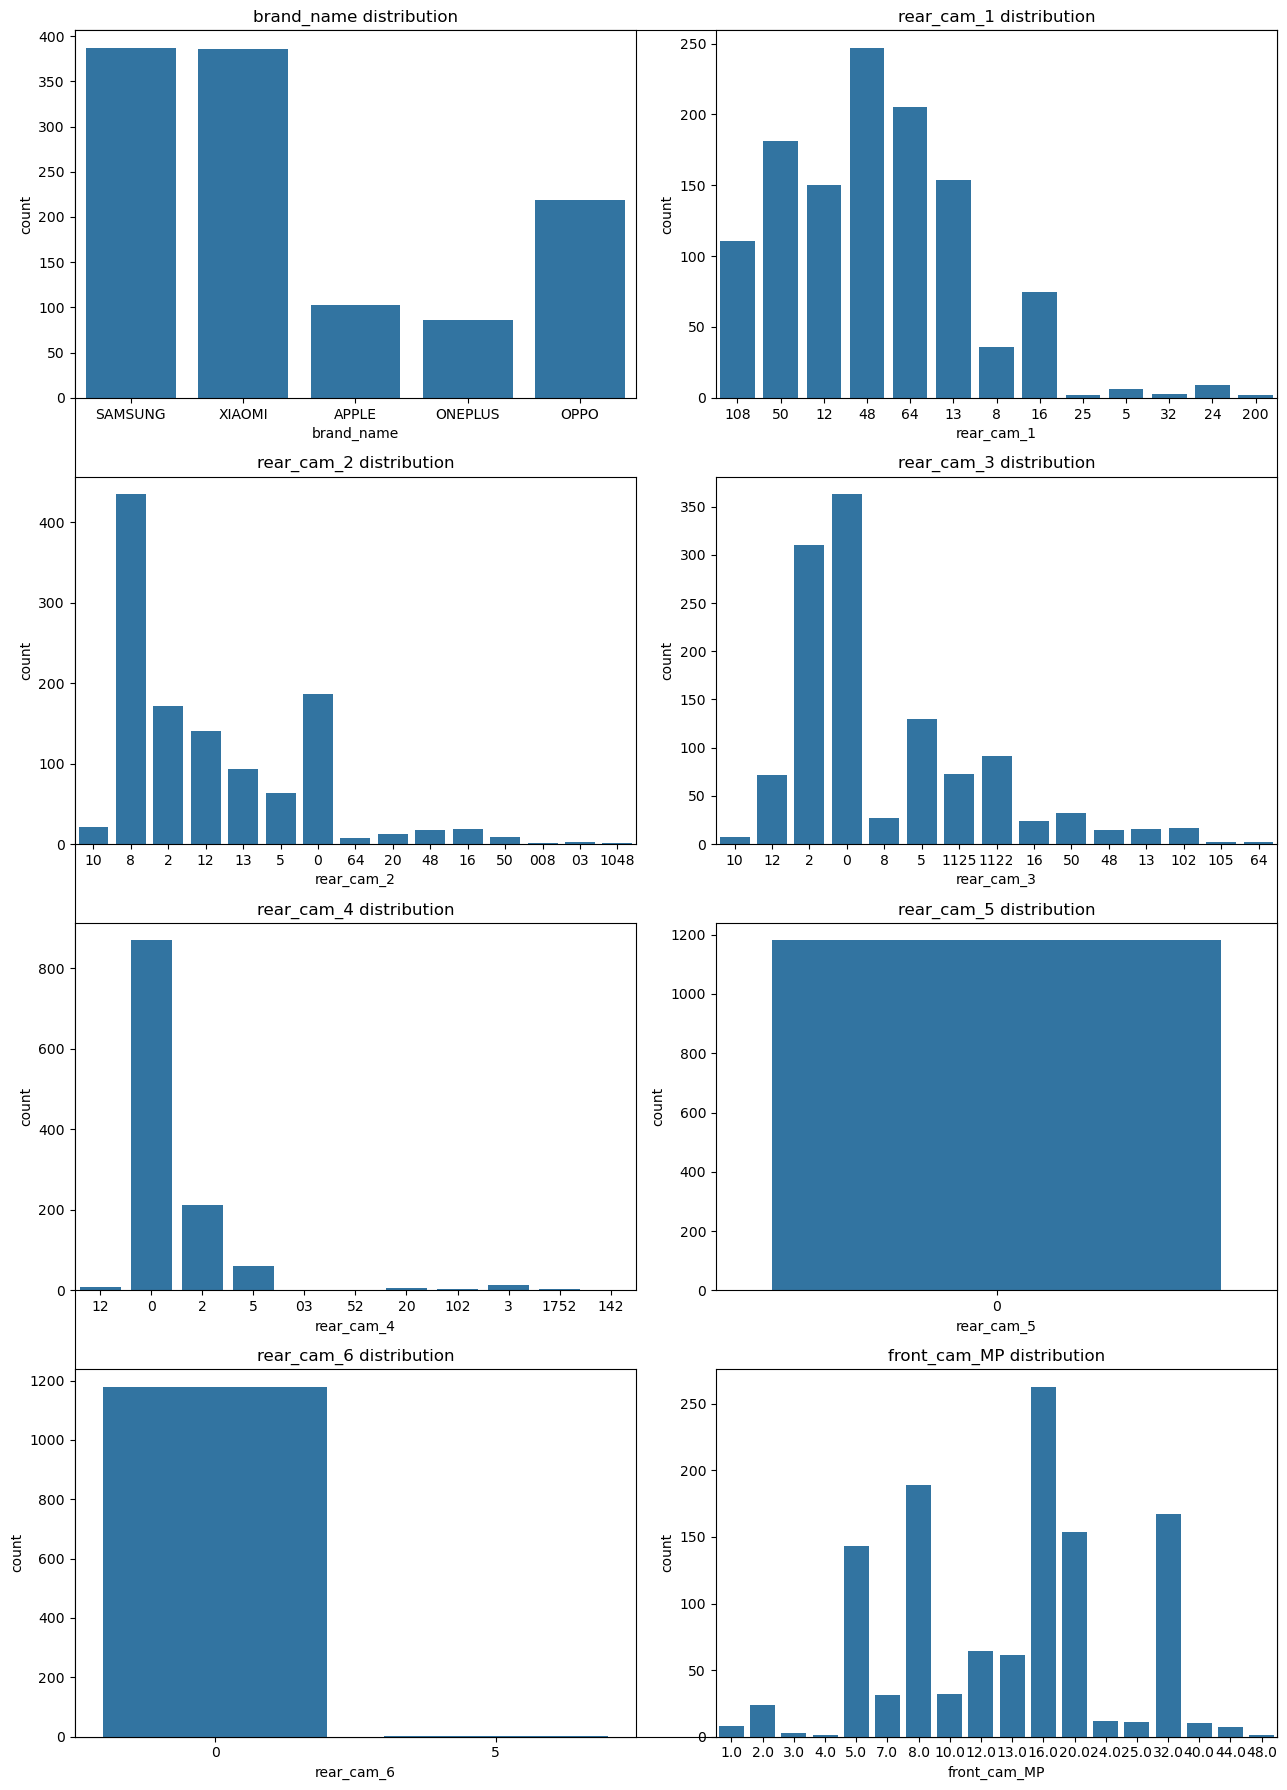

In [38]:
cat_cols= data[['brand_name','rear_cam_1','rear_cam_2','rear_cam_3','rear_cam_4','rear_cam_5','rear_cam_6', 'front_cam_MP']]

fig = plt.subplots(figsize=(13,18))
plt.xticks([])
plt.yticks([])

for i, col in enumerate(cat_cols,1):
    plt.subplot(4,2,i)
    sns.countplot(x=df[col])
    plt.title(f"{col} distribution")
    plt.xlabel(f"{col}")

plt.subplots_adjust(hspace=0.4)
plt.tight_layout()
plt.show()

In [39]:
df[df['rear_cam_5'] >0 ]

Empty DataFrame
Columns: [brand_name, model, rear_camera, processor, ram, internal_storage, price, display_size, rear_cam_count, rear_cam_1, rear_cam_2, rear_cam_3, rear_cam_4, rear_cam_5, rear_cam_6, front_cam_MP, battery_mAh, price_log]
Index: []

## **4) Exploratory Data Analysis - EDA**

Skewness and Kurtosis for price: 
 Skewness: 1.921517841922808 
 Kurtosis: 4.561225964472451 

Skewness and Kurtosis for display_size: 
 Skewness: -1.8767785673712538 
 Kurtosis: 2.9142241650410865 

Skewness and Kurtosis for ram: 
 Skewness: 0.4936134486504253 
 Kurtosis: -0.11091804520121107 

Skewness and Kurtosis for internal_storage: 
 Skewness: 2.0808898637823923 
 Kurtosis: 8.922509991439501 

Skewness and Kurtosis for rear_cam_count: 
 Skewness: -0.5061740561353022 
 Kurtosis: -0.6870037184287363 

Skewness and Kurtosis for battery_mAh: 
 Skewness: -0.6860287847638444 
 Kurtosis: 0.46110593390078547 



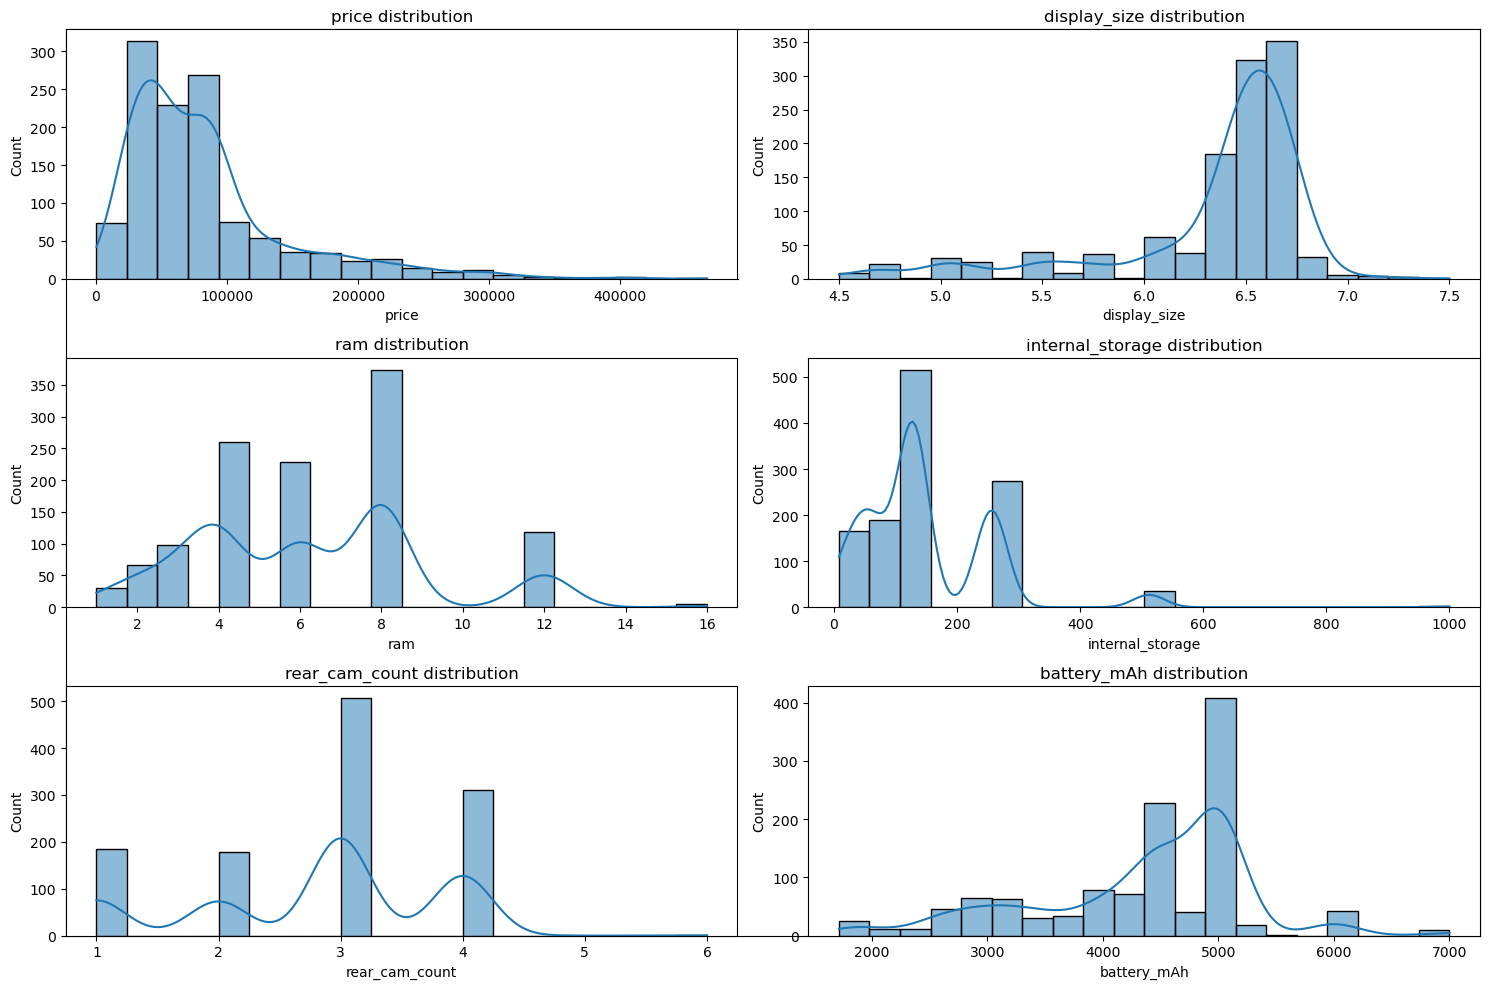

In [60]:
from scipy.stats import skew, kurtosis

cols= data[['price','display_size','ram','internal_storage','rear_cam_count','battery_mAh']]

fig = plt.subplots(figsize=(15,10))
plt.xticks([])
plt.yticks([])
for i, col in enumerate(cols,1):
    plt.subplot(3,2,i)
    sns.histplot(df[col], kde=True, bins=20)
    print(f"Skewness and Kurtosis for {col}: \n Skewness: {df[col].skew()} \n Kurtosis: {df[col].kurtosis()} \n")
    plt.title(f"{col} distribution")
    plt.xlabel(f"{col}")

plt.tight_layout()
plt.show()

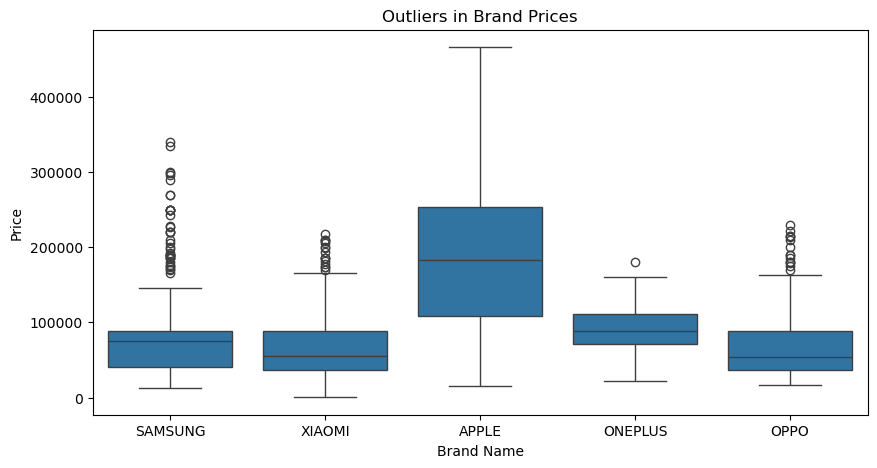

In [41]:
plt.subplots(figsize=(10, 5))  # Set figure size

# Boxplot showing brand_name vs. price
sns.boxplot(x='brand_name', y='price', data=df)
plt.title("Outliers in Brand Prices")
plt.xlabel("Brand Name")
plt.ylabel("Price")
plt.show()

#plt.savefig("outliers_brand.png", dpi=300, bbox_inches='tight')

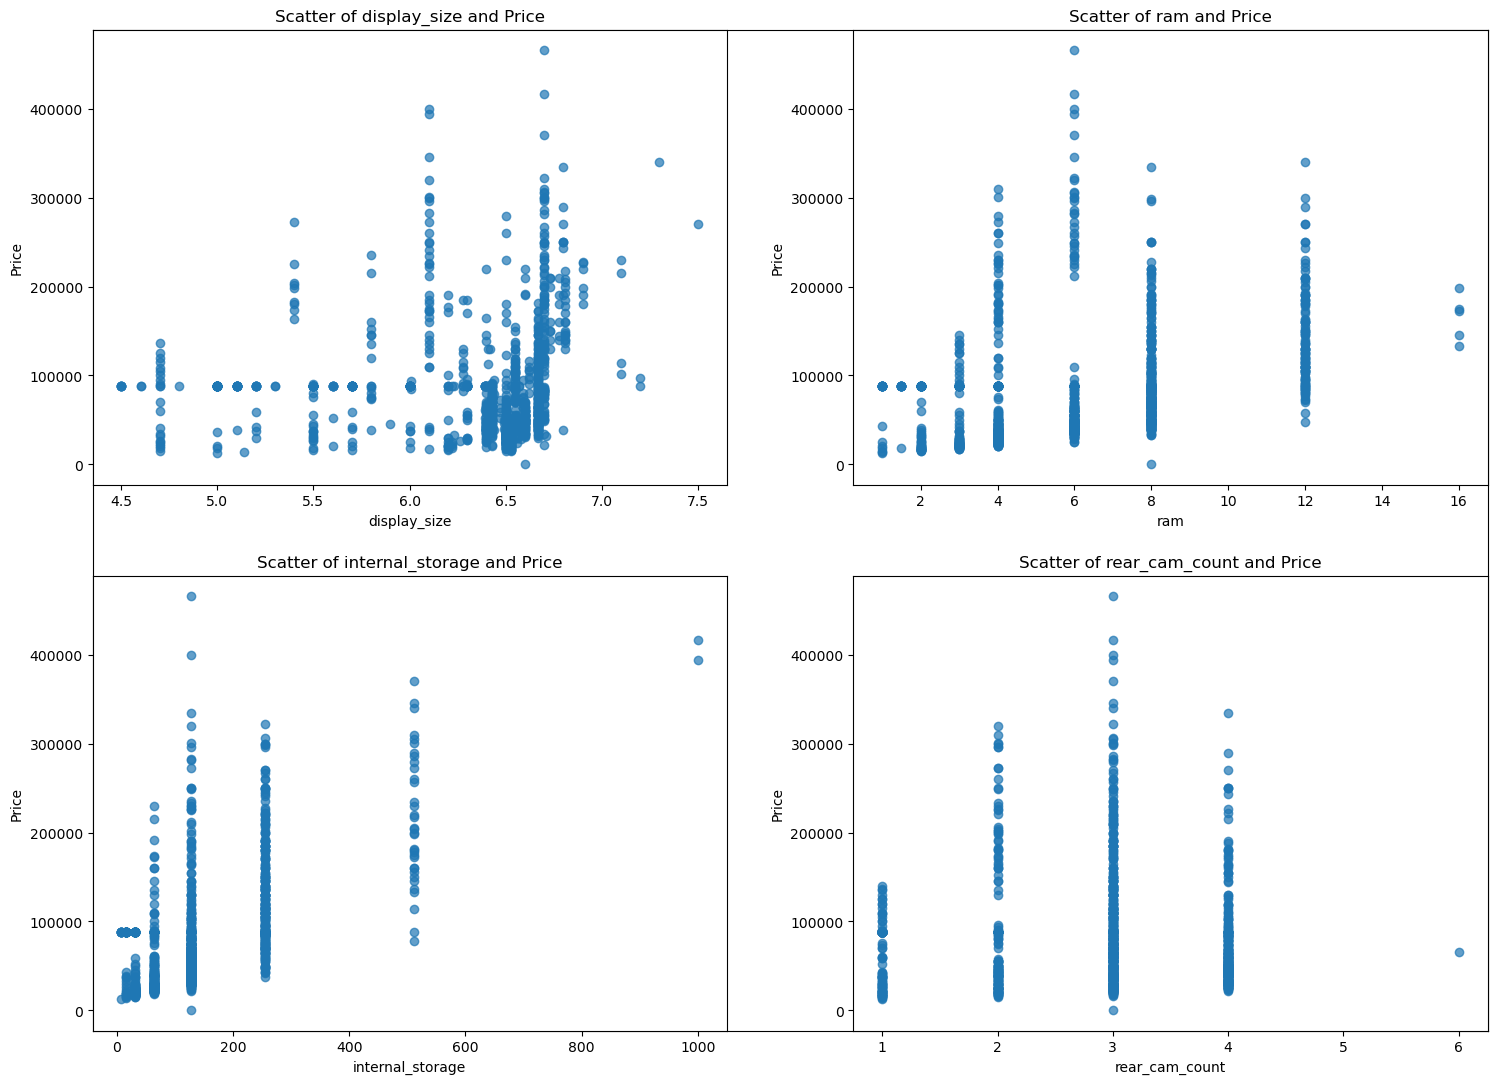

<Figure size 640x480 with 0 Axes>

In [42]:
scatter_col= data[['display_size','ram','internal_storage','rear_cam_count']]

fig = plt.subplots(figsize=(18,13))
plt.xticks([])
plt.yticks([])

for i, col in enumerate(scatter_col,1):
    plt.subplot(2,2,i)
    plt.scatter(df[col], df['price'], alpha=0.7)
    plt.title(f"Scatter of {col} and Price")
    plt.xlabel(f"{col}")
    plt.ylabel('Price')
plt.show()

plt.savefig("scatterplot_2way.png", dpi=300, bbox_inches='tight')

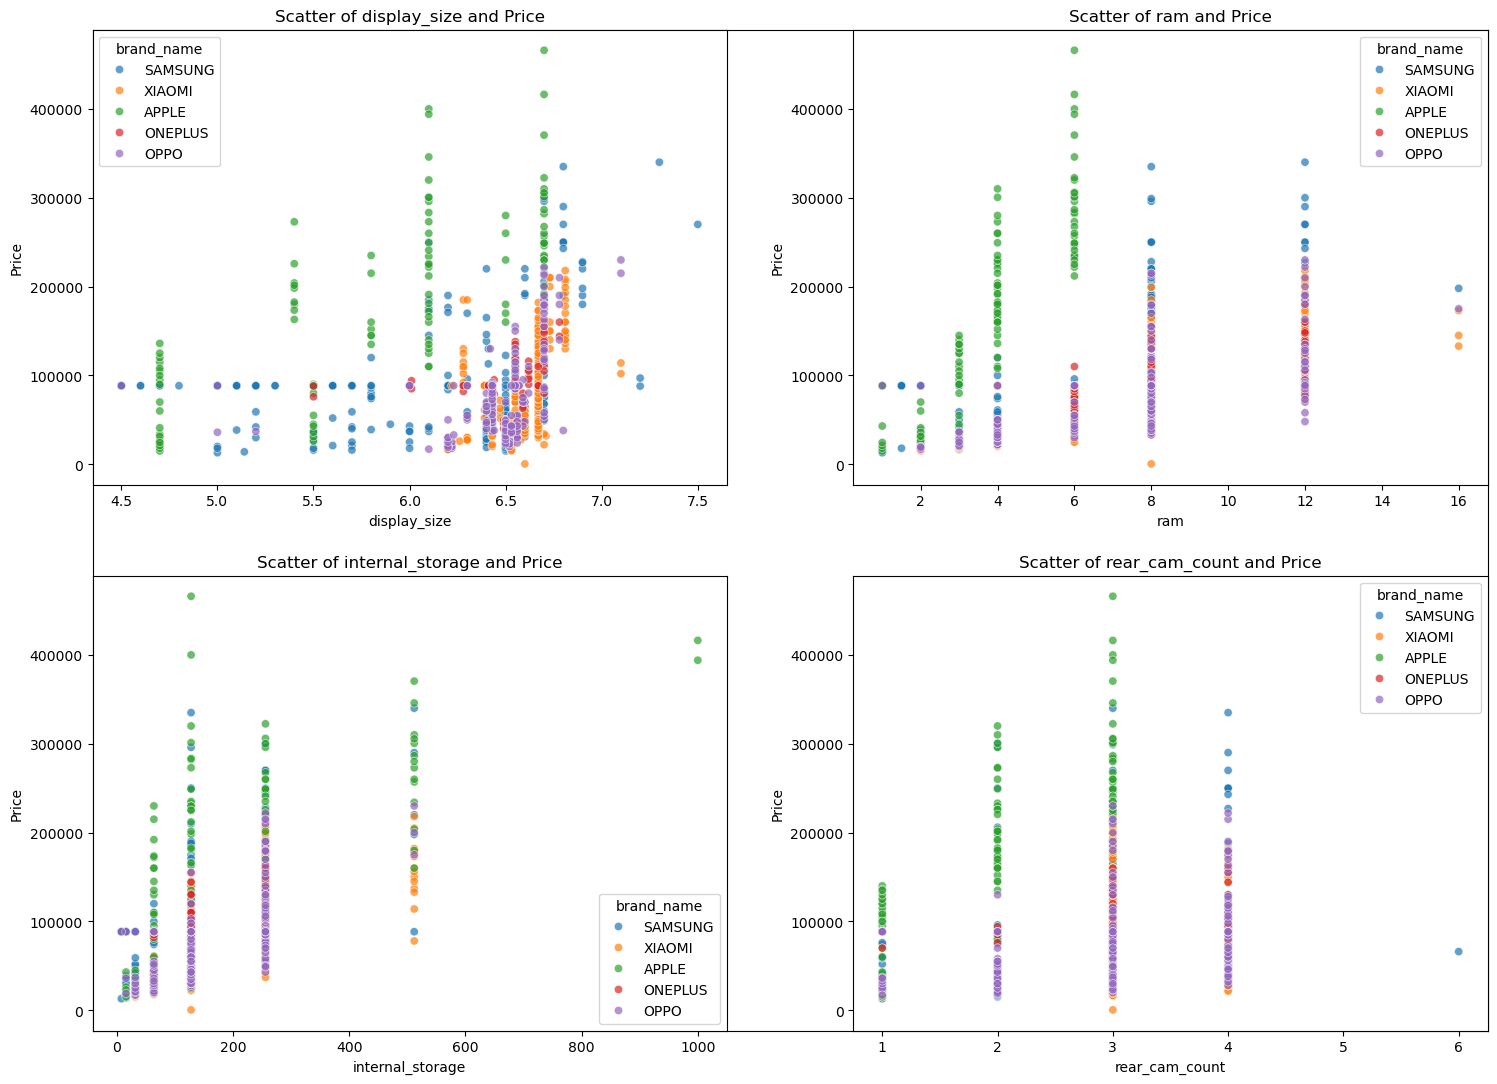

<Figure size 640x480 with 0 Axes>

In [58]:
scatter_col= data[['display_size','ram','internal_storage','rear_cam_count']]

fig = plt.subplots(figsize=(18,13))
plt.xticks([])
plt.yticks([])

for i, col in enumerate(scatter_col,1):
    plt.subplot(2,2,i)
    sns.scatterplot(x=df[col], y=df['price'], hue='brand_name', alpha=0.7, data=df)
    plt.title(f"Scatter of {col} and Price")
    plt.xlabel(f"{col}")
    plt.ylabel('Price')
plt.show()

plt.savefig("scatterplot_2way.png", dpi=300, bbox_inches='tight')

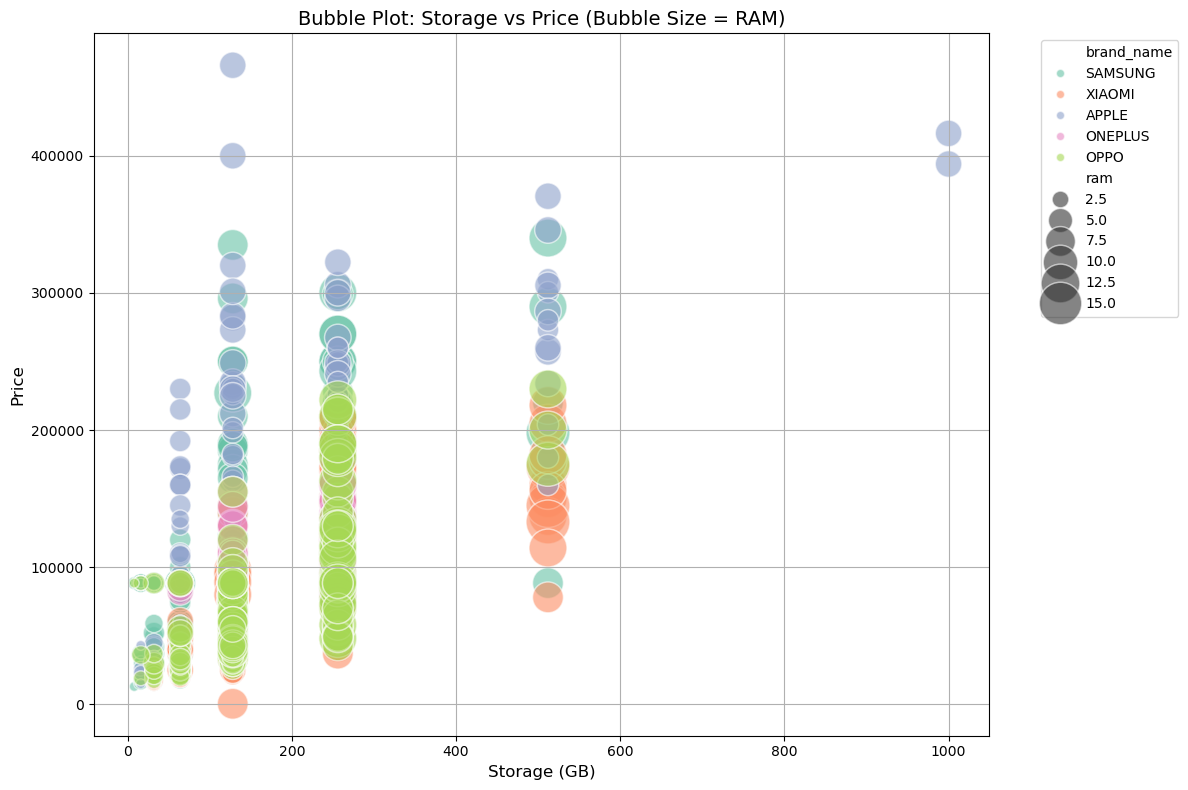

In [44]:
plt.figure(figsize=(12, 8))

# Bubble plot using seaborn
sns.scatterplot(
    data=df, 
    x='internal_storage', 
    y='price', 
    size='ram', 
    hue='brand_name', 
    palette='Set2',  # Automatically assigns colors
    sizes=(50, 1000),  # Scale bubble size for visibility
    alpha=0.6
)

# Add plot details
plt.title("Bubble Plot: Storage vs Price (Bubble Size = RAM)", fontsize=14)
plt.xlabel("Storage (GB)", fontsize=12)
plt.ylabel("Price", fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Place legend outside
plt.grid(True)
plt.tight_layout()
plt.show()


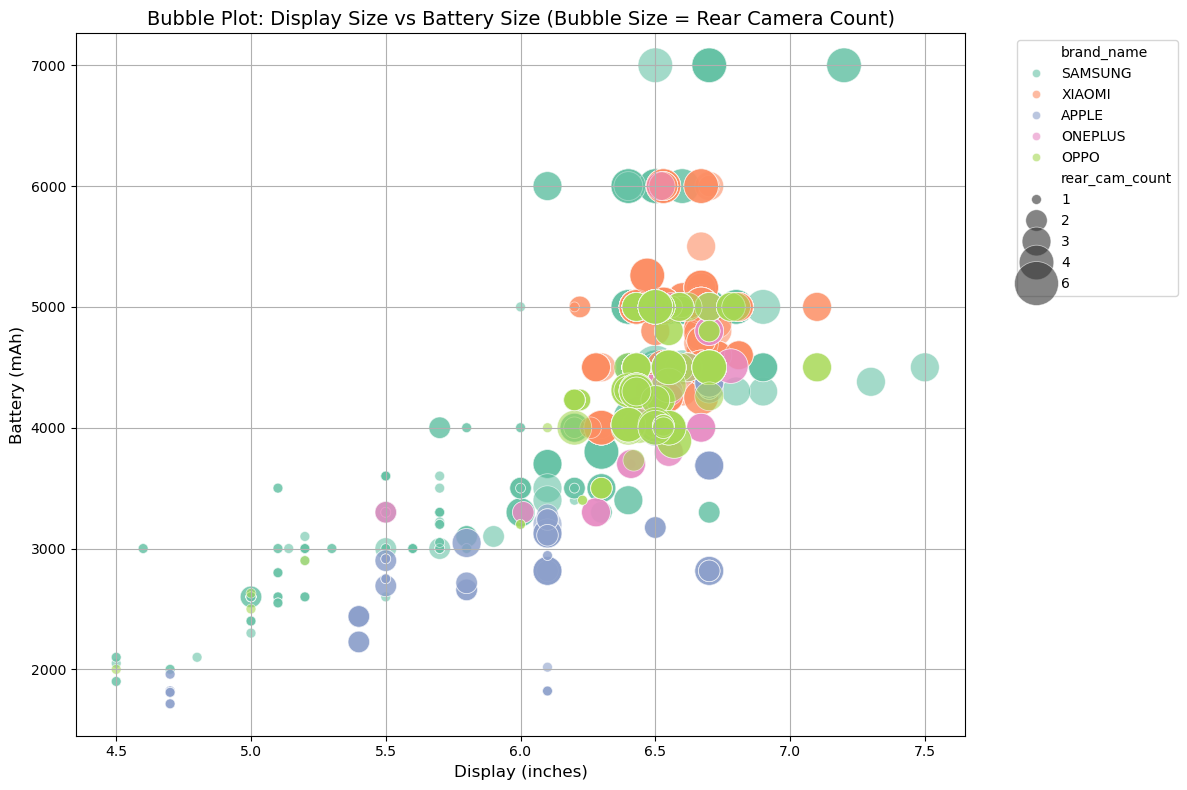

In [45]:
plt.figure(figsize=(12, 8))

# Bubble plot using seaborn
sns.scatterplot(
    data=data, 
    x='display_size', 
    y='battery_mAh', 
    size='rear_cam_count', 
    hue='brand_name', 
    palette='Set2',  # Automatically assigns colors
    sizes=(50, 1000),  # Scale bubble size for visibility
    alpha=0.6
)

# Add plot details
plt.title("Bubble Plot: Display Size vs Battery Size (Bubble Size = Rear Camera Count)", fontsize=14)
plt.xlabel("Display (inches)", fontsize=12)
plt.ylabel("Battery (mAh)", fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Place legend outside
plt.grid(True)
plt.tight_layout()
plt.show()


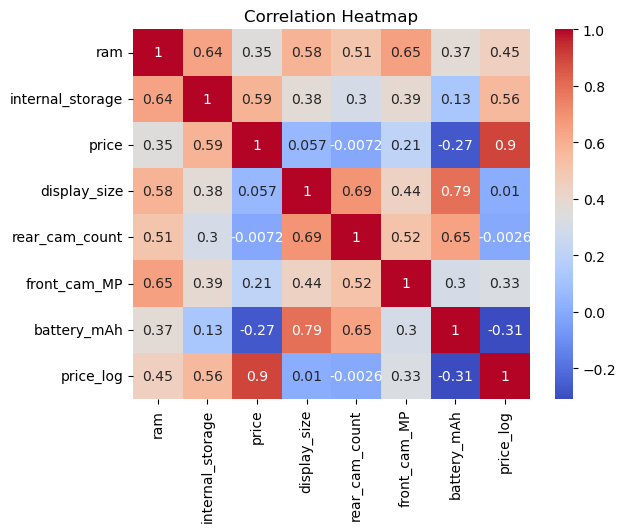

<Figure size 640x480 with 0 Axes>

In [46]:
# Convert columns to numeric if they are not
num_cols = ['ram', 'internal_storage', 'price', 'display_size', 'rear_cam_count', 'front_cam_MP', 'battery_mAh', 'price_log']

# Use pd.to_numeric to force conversion, errors='coerce' will turn invalid parsing into NaNs
data[num_cols] = data[num_cols].apply(pd.to_numeric, errors='coerce')

# Remove rows with NaN values or handle them
num_cols_clean = data[num_cols].dropna()  # or fill with mean: data[num_cols].fillna(data[num_cols].mean())

sns.heatmap(num_cols_clean.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

plt.savefig("corr_matrix.png", dpi=300, bbox_inches='tight')

### **5) Machine Learning Models**

In [47]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [48]:
X = data[['OPPO','SAMSUNG','XIAOMI','ONEPLUS', 'rear_cam_count','front_cam_MP','display_size','ram','internal_storage',
          'battery_mAh','rear_cam_1','rear_cam_2','rear_cam_3','rear_cam_4','rear_cam_5','rear_cam_6']]  # predictors

y = data['price_log']  # Target variable

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the size of the splits
print(f"Training data size: {X_train.shape[0]} samples")
print(f"Test data size: {X_test.shape[0]} samples")

Training data size: 944 samples
Test data size: 237 samples


### Linear, Lasso, and Ridge Regression

Linear Regression:
  MSE: 0.157, R²: 0.646
  MAE: 0.3159
  RMSE: 0.3960

Ridge Regression:
  MSE: 0.160, R²: 0.638
  MAE: 0.3215
  RMSE: 0.4002

Lasso Regression:
  MSE: 0.210, R²: 0.526
  MAE: 0.3619
  RMSE: 0.4580


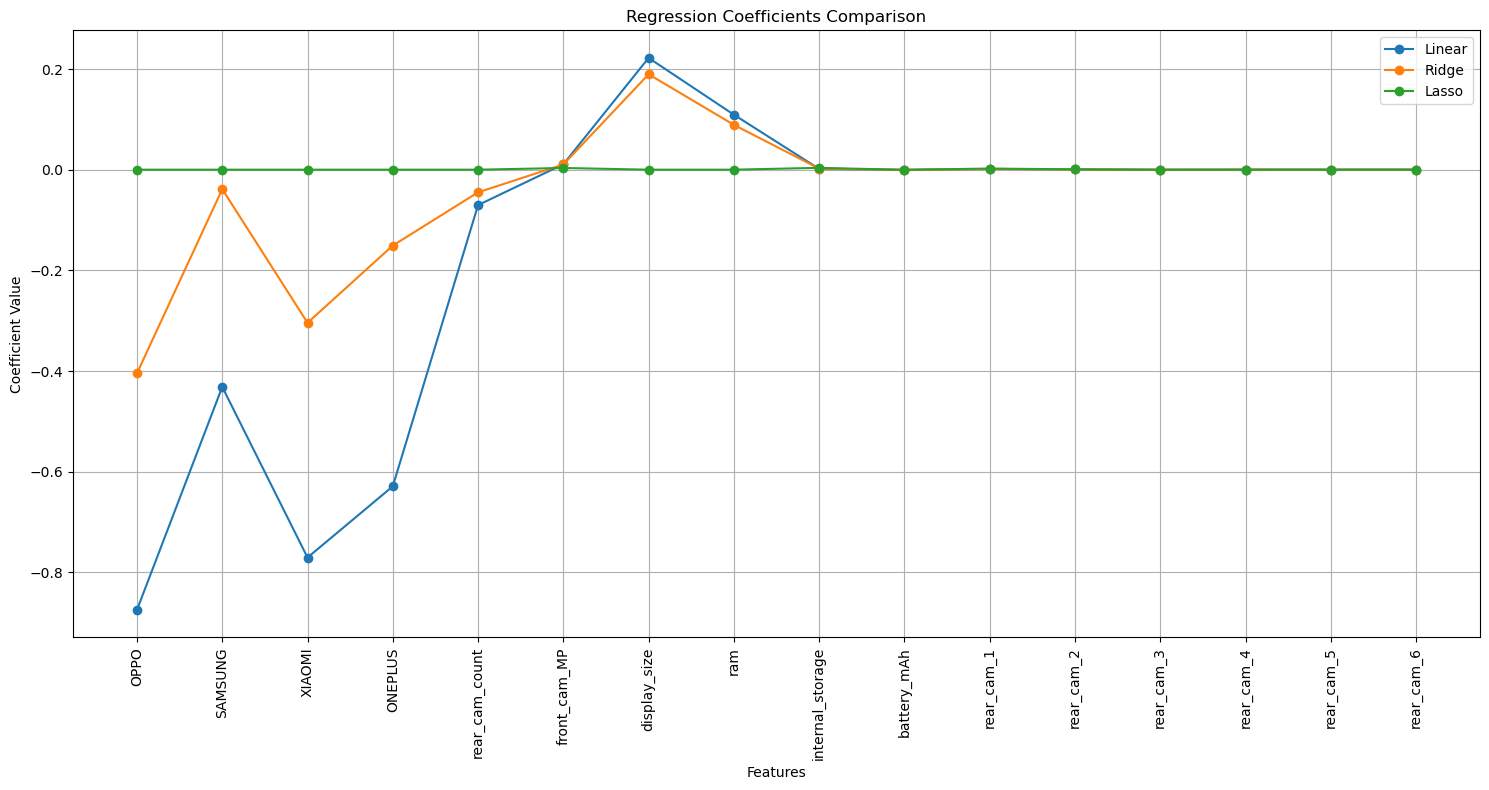

In [50]:
from sklearn.metrics import mean_squared_error, r2_score

linear_model = LinearRegression()
ridge_model = Ridge(alpha=20.0)  # Adjust alpha as needed
lasso_model = Lasso(alpha=1.0)  # Adjust alpha as needed

# Fit the models
linear_model.fit(X_train, y_train)
ridge_model.fit(X_train, y_train)
lasso_model.fit(X_train, y_train)

# Make predictions
y_pred_linear = linear_model.predict(X_test)
y_pred_ridge = ridge_model.predict(X_test)
y_pred_lasso = lasso_model.predict(X_test)

# Evaluate the models
mse_linear = mean_squared_error(y_test, y_pred_linear)
mae_linear = mean_absolute_error(y_test, y_pred_linear)
rmse_linear = np.sqrt(mse_linear)

mse_ridge = mean_squared_error(y_test, y_pred_ridge)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)

mse_lasso = mean_squared_error(y_test, y_pred_lasso)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)

r2_linear = r2_score(y_test, y_pred_linear)
r2_ridge = r2_score(y_test, y_pred_ridge)
r2_lasso = r2_score(y_test, y_pred_lasso)

print("Linear Regression:")
print(f"  MSE: {mse_linear:.3f}, R²: {r2_linear:.3f}")
print(f"  MAE: {mae_linear:.4f}")
print(f"  RMSE: {rmse_linear:.4f}")
print("\nRidge Regression:")
print(f"  MSE: {mse_ridge:.3f}, R²: {r2_ridge:.3f}")
print(f"  MAE: {mae_ridge:.4f}")
print(f"  RMSE: {rmse_ridge:.4f}")
print("\nLasso Regression:")
print(f"  MSE: {mse_lasso:.3f}, R²: {r2_lasso:.3f}")
print(f"  MAE: {mae_lasso:.4f}")
print(f"  RMSE: {rmse_lasso:.4f}")

# Plot coefficients for comparison
models = ['Linear', 'Ridge', 'Lasso']
coefs = [linear_model.coef_, ridge_model.coef_, lasso_model.coef_]

plt.figure(figsize=(15, 8))
for i, model in enumerate(models):
    plt.plot(range(len(coefs[i])), coefs[i], marker='o', label=model)

features = ['OPPO','SAMSUNG','XIAOMI','ONEPLUS', 'rear_cam_count','front_cam_MP','display_size','ram','internal_storage',
            'battery_mAh','rear_cam_1','rear_cam_2','rear_cam_3','rear_cam_4','rear_cam_5','rear_cam_6']

plt.xticks(range(len(features)), features, rotation=90)

plt.title('Regression Coefficients Comparison')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### Decision Tree Regressor

In [51]:
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor(
    criterion='squared_error',  # Criterion to measure quality of split
    splitter='best',  # Best split strategy
    max_depth=None,   # No limit on depth (will grow until stopping conditions)
    min_samples_split=2,  # Minimum samples required to split a node
    min_samples_leaf=1,   # Minimum samples required to be at a leaf node
    min_weight_fraction_leaf=0.0,  # No minimum weight for the fraction of samples
    max_features=None,  # Consider all features for each split
    random_state=42,  # Random seed for reproducibility
    max_leaf_nodes=None,  # No limit on leaf nodes
    min_impurity_decrease=0.0,  # No minimum impurity decrease for splits
    ccp_alpha=0.0,  # No pruning
)

regressor.fit(X_train, y_train)


DecisionTreeRegressor(random_state=42)

In [52]:
# Predict on the training data and test data
y_train_pred = regressor.predict(X_train)
y_test_pred = regressor.predict(X_test)

# R² for both training and test data
r2_train = regressor.score(X_train, y_train)
r2_test = regressor.score(X_test, y_test)

# Adjusted R² for both training and test data
n_train = X_train.shape[0]  # Number of training samples
p = X_train.shape[1]  # Number of features
adj_r2_train = 1 - (1 - r2_train) * (n_train - 1) / (n_train - p - 1)

n_test = X_test.shape[0]  # Number of test samples
adj_r2_test = 1 - (1 - r2_test) * (n_test - 1) / (n_test - p - 1)

# MAE, MSE, and RMSE for both training and test data
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

# Display all metrics for both training and test data
print(f"Training Data R²: {r2_train:.4f}")
print(f"Test Data R²: {r2_test:.4f} \n")
print(f"Training Data Adjusted R²: {adj_r2_train:.4f}")
print(f"Test Data Adjusted R²: {adj_r2_test:.4f} \n")
print(f"Training Data MAE: {mae_train:.4f}")
print(f"Test Data MAE: {mae_test:.4f} \n")
print(f"Training Data MSE: {mse_train:.4f}")
print(f"Test Data MSE: {mse_test:.4f} \n")
print(f"Training Data RMSE: {rmse_train:.4f}")
print(f"Test Data RMSE: {rmse_test:.4f}")


Training Data R²: 0.9871
Test Data R²: 0.7722 

Training Data Adjusted R²: 0.9869
Test Data Adjusted R²: 0.7556 

Training Data MAE: 0.0266
Test Data MAE: 0.1998 

Training Data MSE: 0.0064
Test Data MSE: 0.1008 

Training Data RMSE: 0.0802
Test Data RMSE: 0.3176


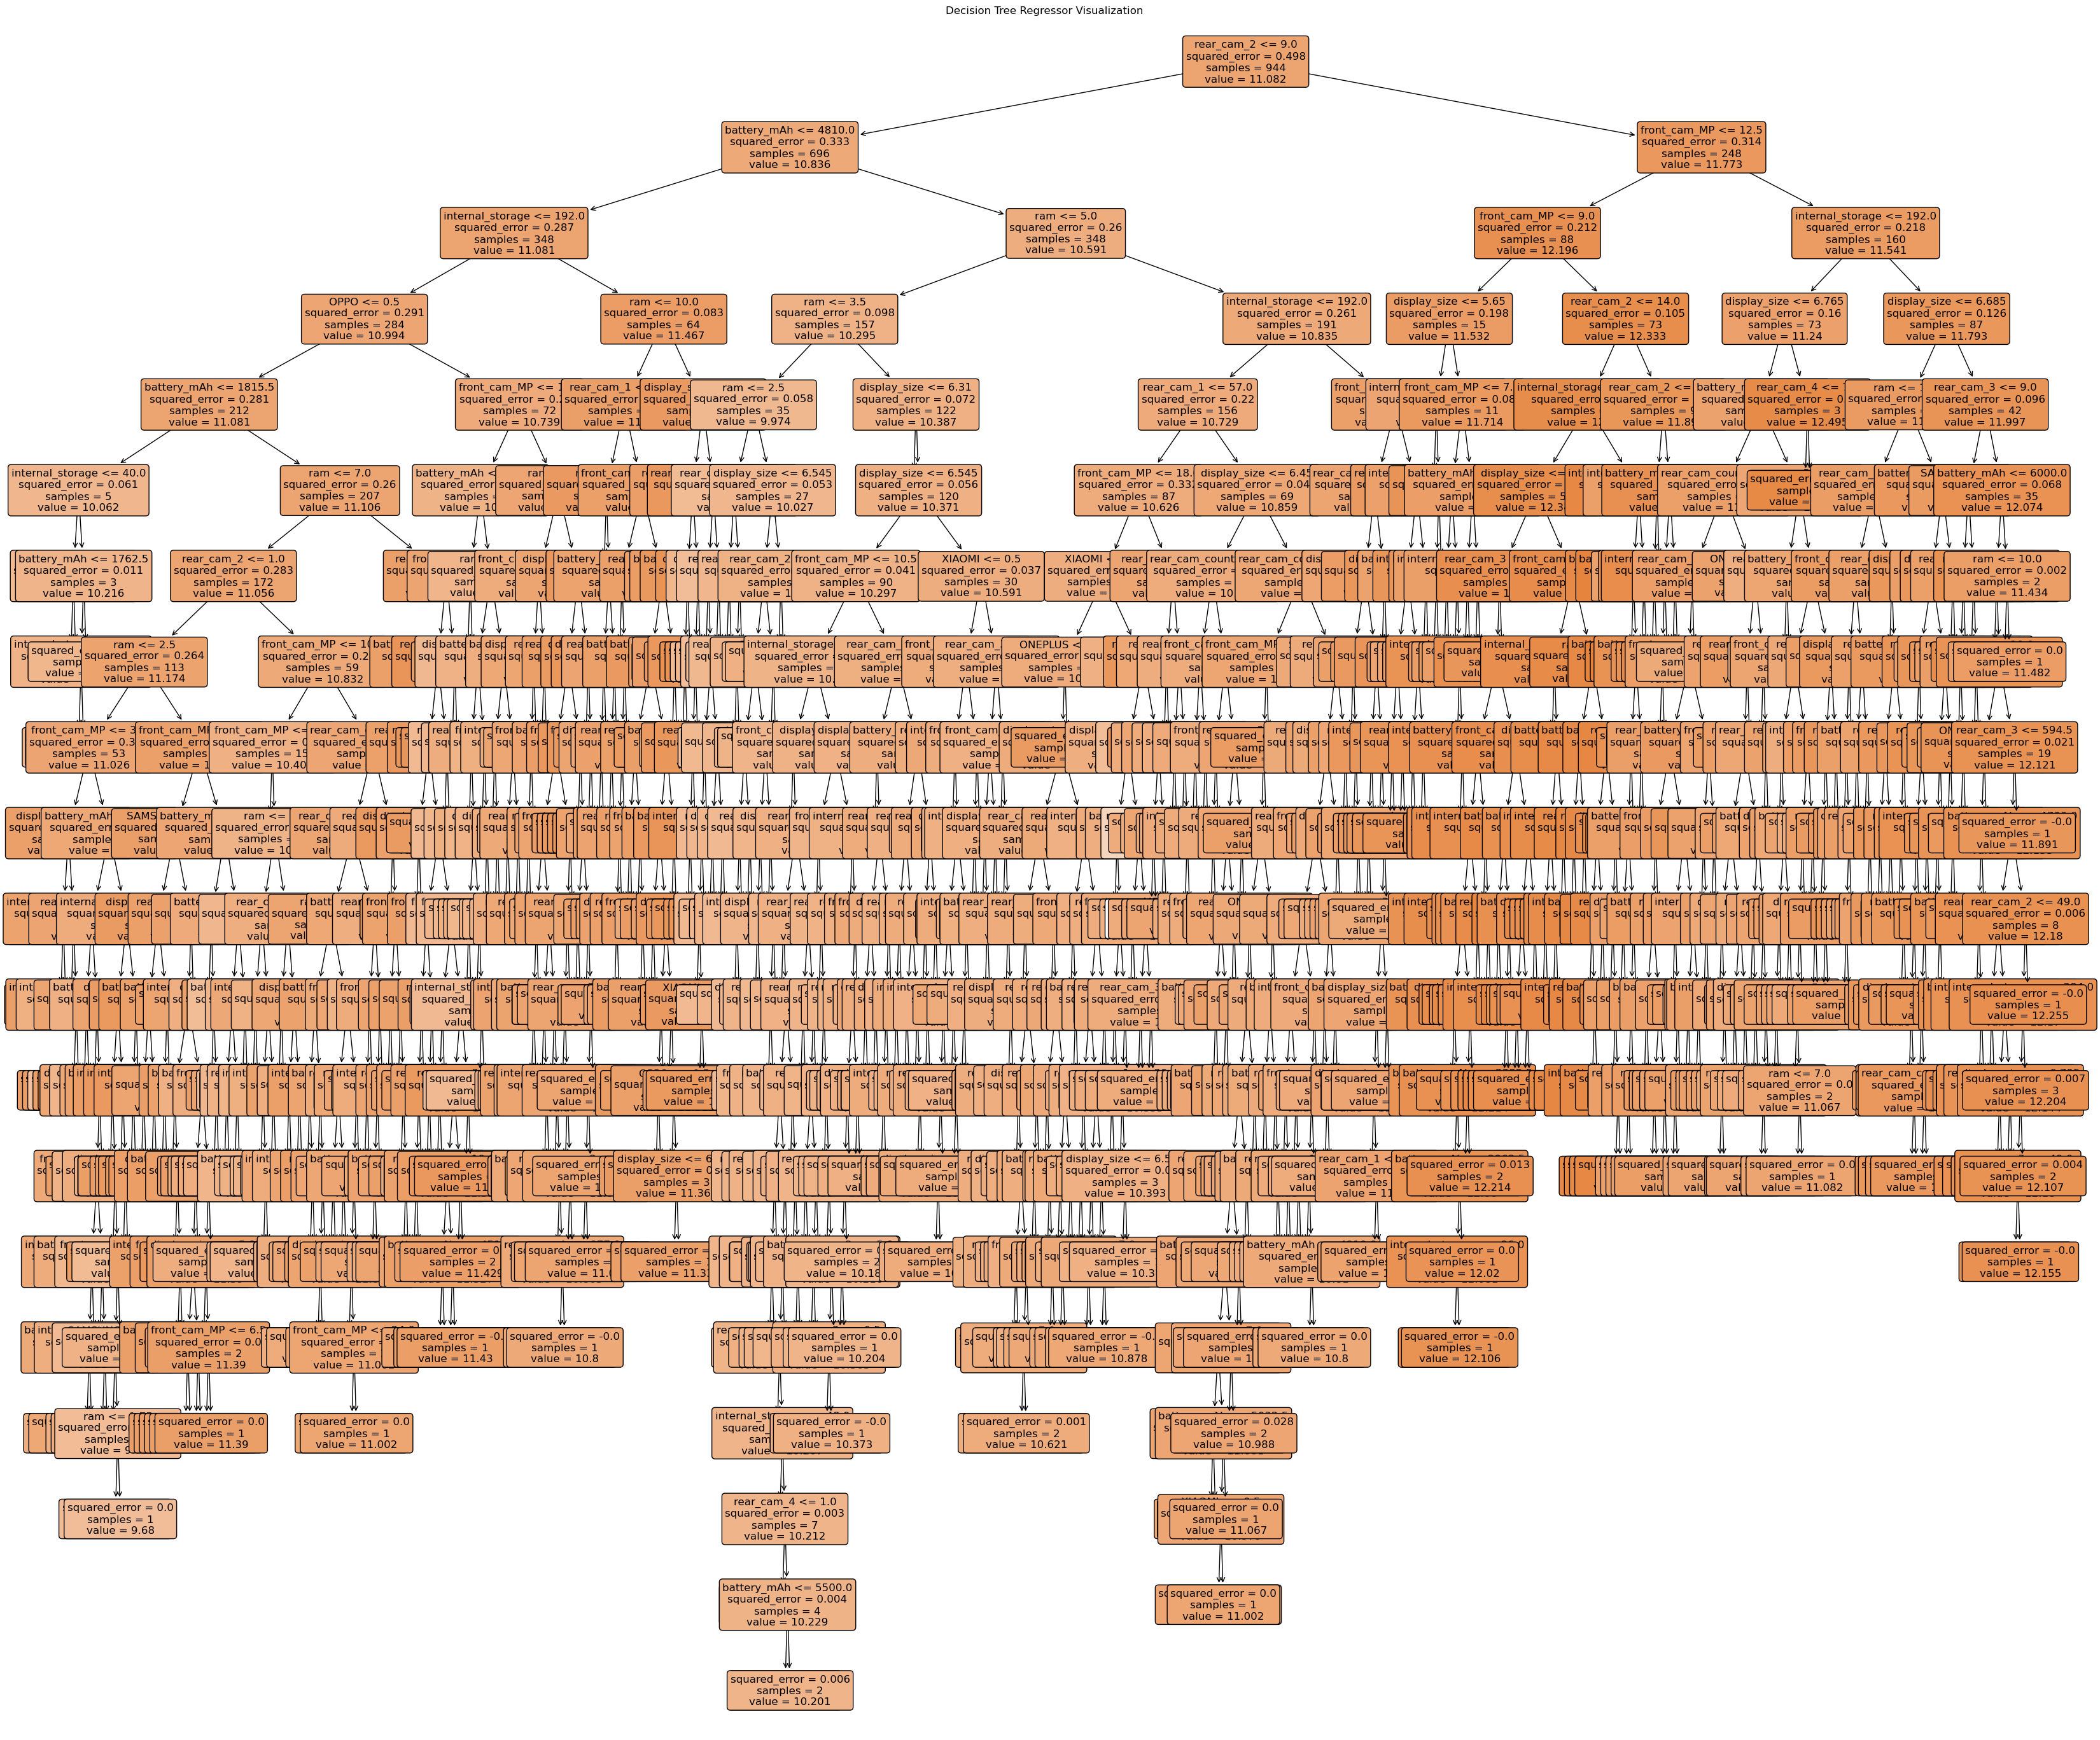

In [53]:
from sklearn.tree import plot_tree

# Plot the trained Decision Tree with matplotlib
plt.figure(figsize=(40, 35))  # Adjust the size to make it larger
plot_tree(
    regressor, 
    filled=True, 
    feature_names= features,  # Feature names
    rounded=True, 
    fontsize=12
)
plt.title("Decision Tree Regressor Visualization")
plt.show()


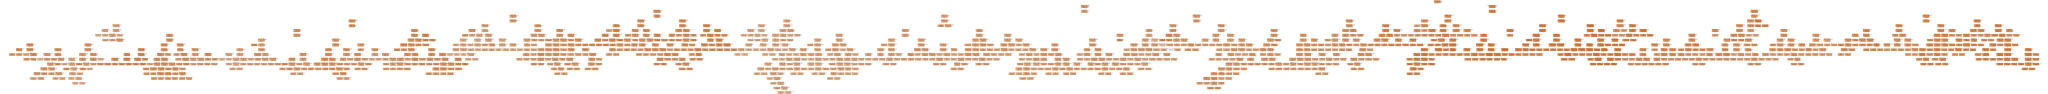

In [54]:
import graphviz
from sklearn.tree import export_graphviz

# Export the trained decision tree to a .dot format
dot_data = export_graphviz(
    regressor, 
    filled=True, 
    feature_names=features,  # Feature names
    rounded=True, 
    special_characters=True,  # Ensures special characters are handled correctly
)

# Visualize the decision tree using graphviz
graph = graphviz.Source(dot_data)
graph


# 